<a href="https://colab.research.google.com/github/kailee0422/Machine-Learning/blob/main/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML HW2

[Decision Tree Plot](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)

[Decision Tree Compare Plot](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html)

#Load the copy of the Iris dataset shipped with scikit-learn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#Display the decision functions of trees trained on all pairs of features.


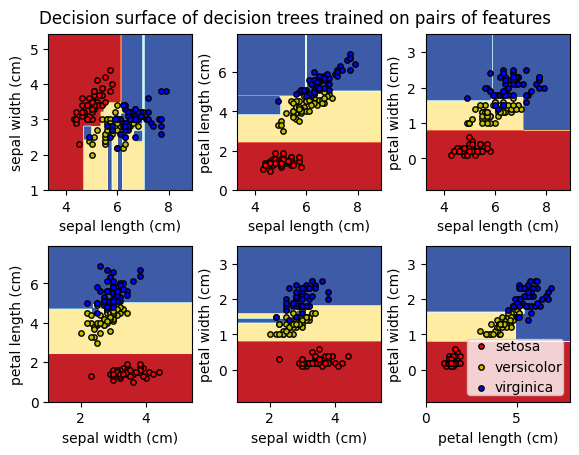

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

#Display the structure of a single decision tree trained on all the features together.



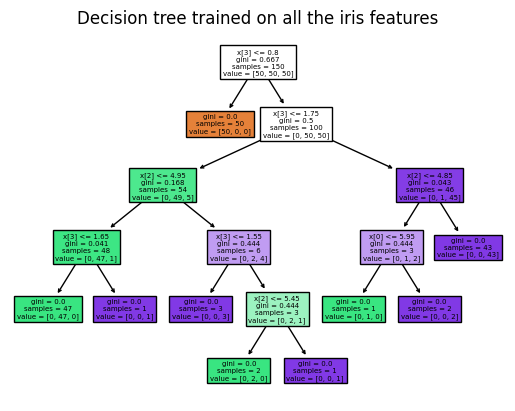

In [4]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666
AdaBoost with 30 estimators with features [0, 1] has a score of 0.82
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.9866666666666667


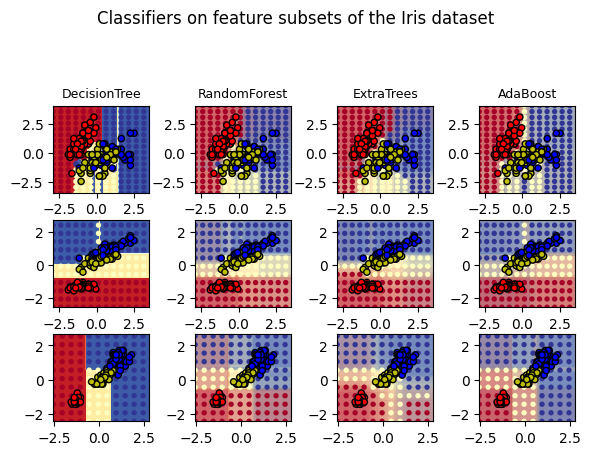

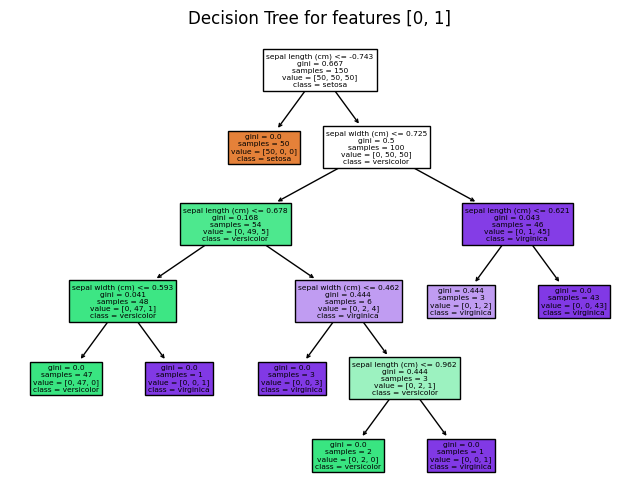

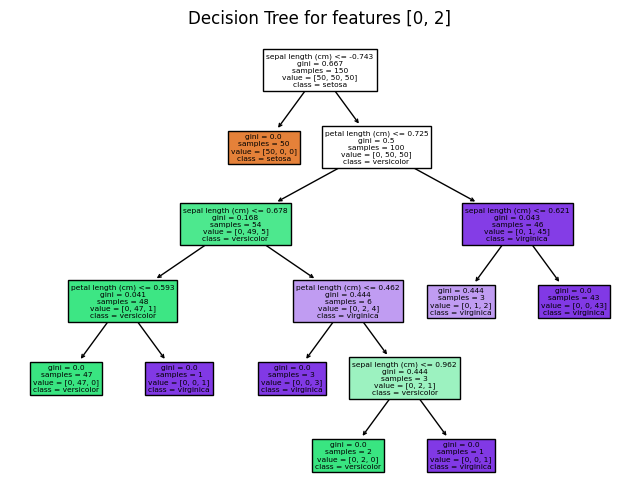

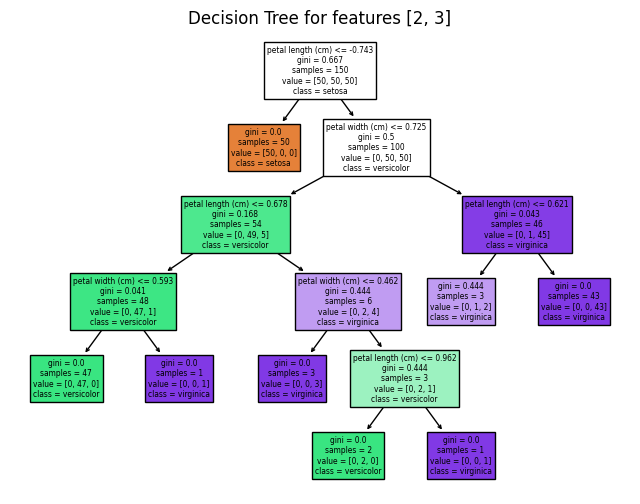

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=n_estimators,
        algorithm="SAMME",
    ),
]

# Store decision tree models for later plotting
decision_tree_models = []

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
            decision_tree_models.append((model, pair))  # Store the model for later
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

# Show all plots for classifiers
plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

# Now output the decision trees for each feature pair
for model, pair in decision_tree_models:
    plt.figure(figsize=(8, 6))
    plot_tree(model, filled=True, feature_names=np.array(iris.feature_names)[pair], class_names=iris.target_names)
    plt.title(f"Decision Tree for features {pair}")
    plt.show()


DecisionTree with features [0, 3] has a score of 0.9733333333333334
RandomForest with 30 estimators with features [0, 3] has a score of 0.9733333333333334
ExtraTrees with 30 estimators with features [0, 3] has a score of 0.9733333333333334
AdaBoost with 30 estimators with features [0, 3] has a score of 0.9666666666666667
DecisionTree with features [1, 2] has a score of 0.9866666666666667
RandomForest with 30 estimators with features [1, 2] has a score of 0.9866666666666667
ExtraTrees with 30 estimators with features [1, 2] has a score of 0.9866666666666667
AdaBoost with 30 estimators with features [1, 2] has a score of 0.9866666666666667
DecisionTree with features [1, 3] has a score of 0.98
RandomForest with 30 estimators with features [1, 3] has a score of 0.98
ExtraTrees with 30 estimators with features [1, 3] has a score of 0.98
AdaBoost with 30 estimators with features [1, 3] has a score of 0.98


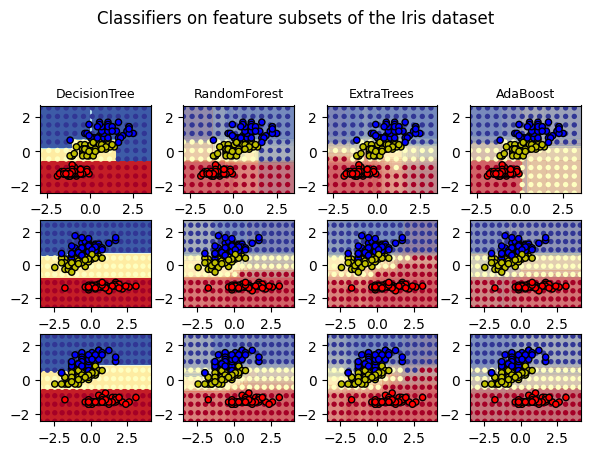

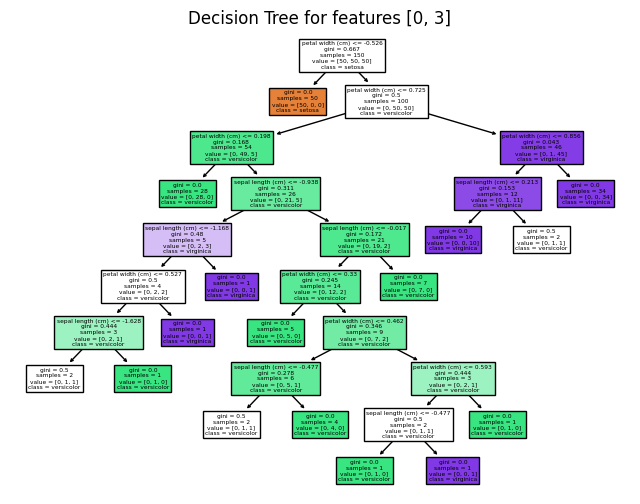

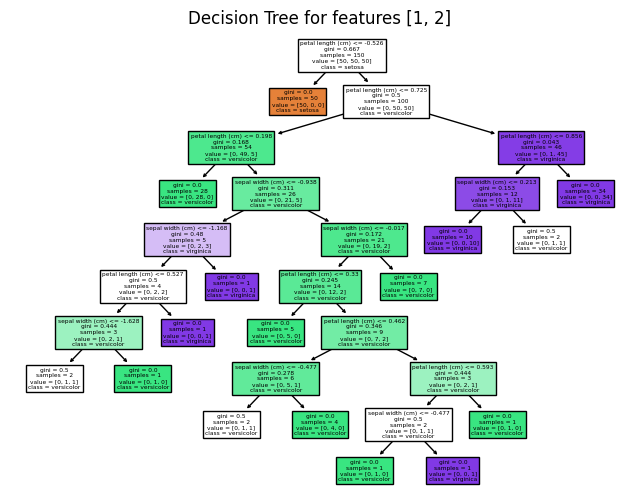

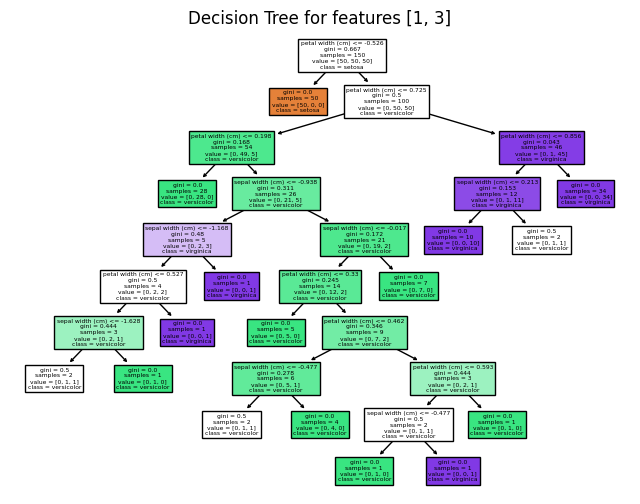

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=n_estimators,
        algorithm="SAMME",
    ),
]

# Store decision tree models for later plotting
decision_tree_models = []

for pair in ([0, 3], [1, 2], [1, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
            decision_tree_models.append((model, pair))  # Store the model for later
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

# Show all plots for classifiers
plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

# Now output the decision trees for each feature pair
for model, pair in decision_tree_models:
    plt.figure(figsize=(8, 6))
    plot_tree(model, filled=True, feature_names=np.array(iris.feature_names)[pair], class_names=iris.target_names)
    plt.title(f"Decision Tree for features {pair}")
    plt.show()


#Vary the max_depth

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666
Best max_depth for AdaBoost with feature subset [0, 1]: 8 with accuracy 0.9266666666666666


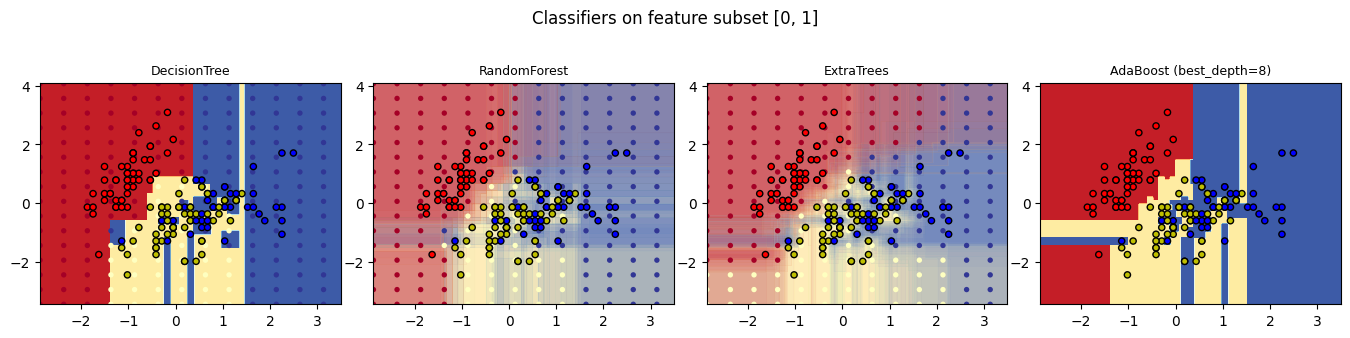

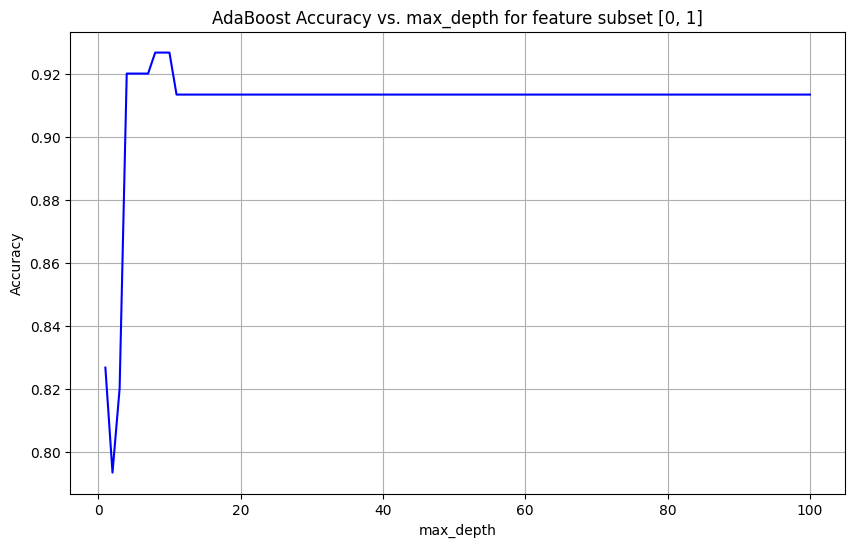

DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333
Best max_depth for AdaBoost with feature subset [0, 2]: 2 with accuracy 0.9933333333333333


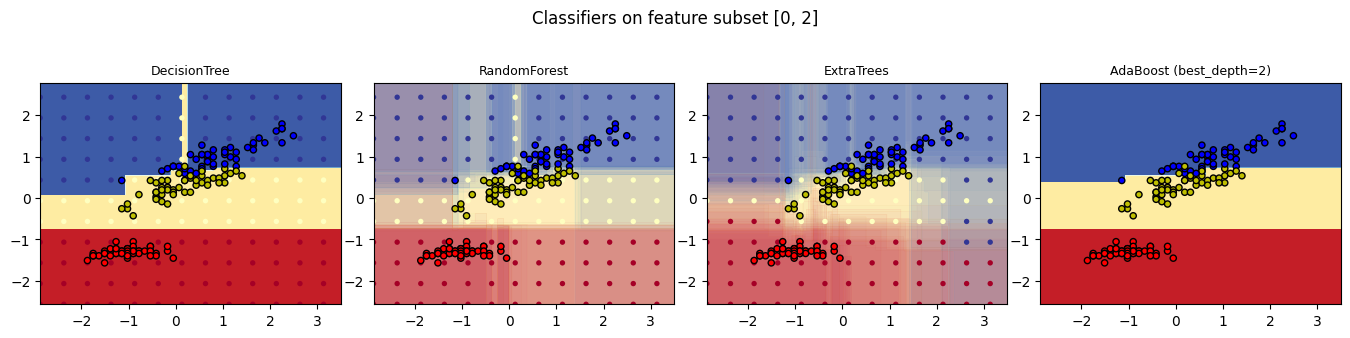

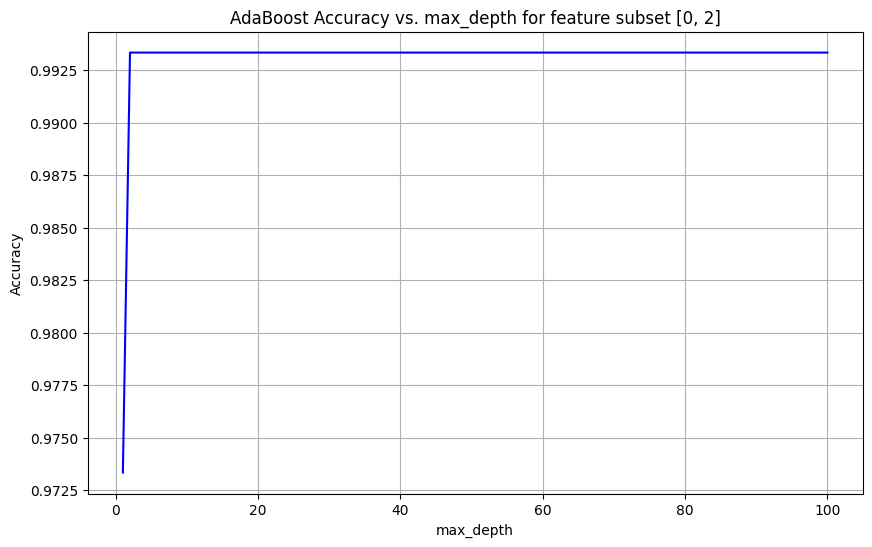

DecisionTree with features [0, 3] has a score of 0.9733333333333334
RandomForest with 30 estimators with features [0, 3] has a score of 0.9733333333333334
ExtraTrees with 30 estimators with features [0, 3] has a score of 0.9733333333333334
Best max_depth for AdaBoost with feature subset [0, 3]: 2 with accuracy 0.9733333333333334


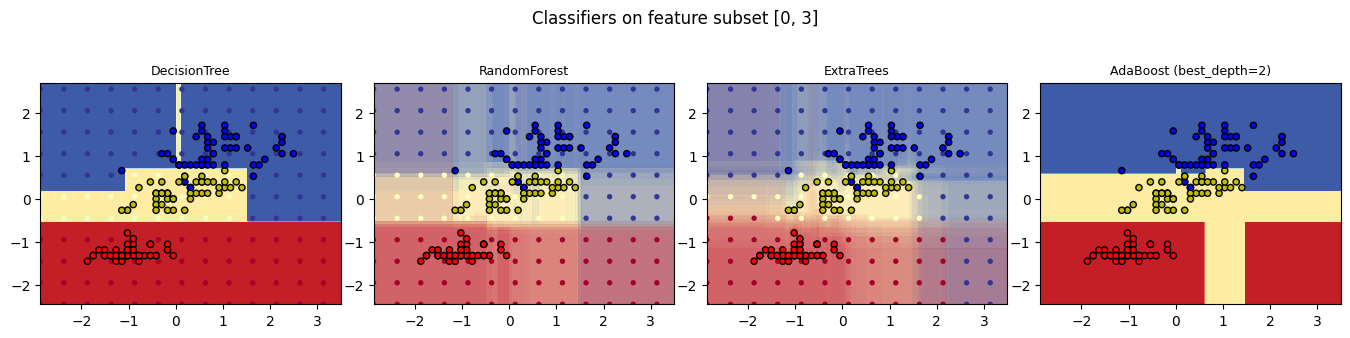

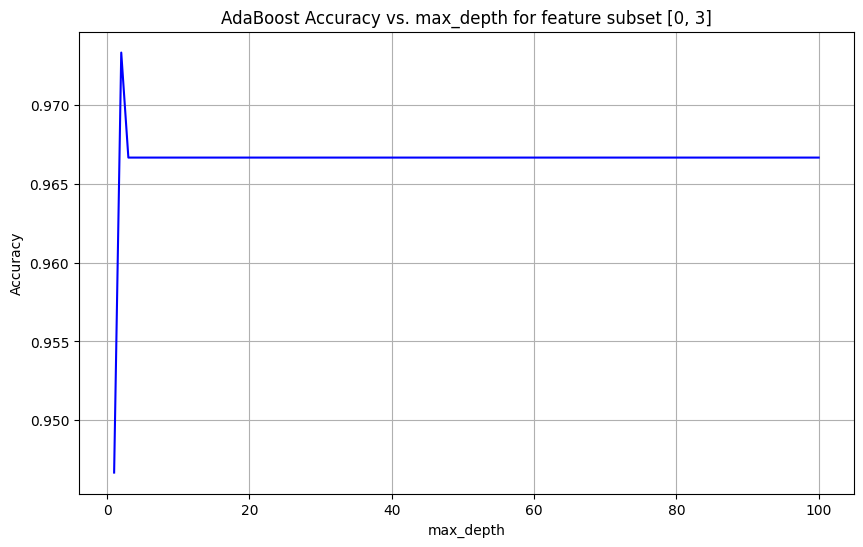

DecisionTree with features [1, 2] has a score of 0.9866666666666667
RandomForest with 30 estimators with features [1, 2] has a score of 0.9866666666666667
ExtraTrees with 30 estimators with features [1, 2] has a score of 0.9866666666666667
Best max_depth for AdaBoost with feature subset [1, 2]: 3 with accuracy 0.9866666666666667


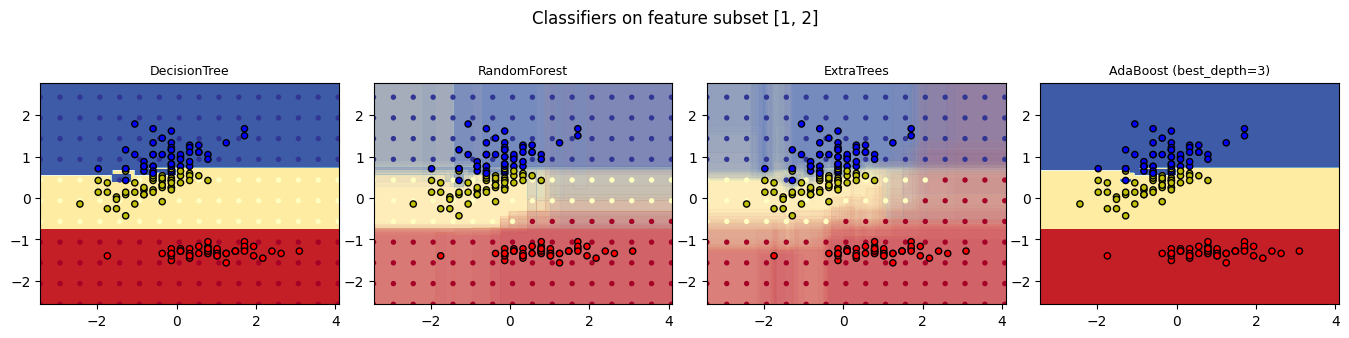

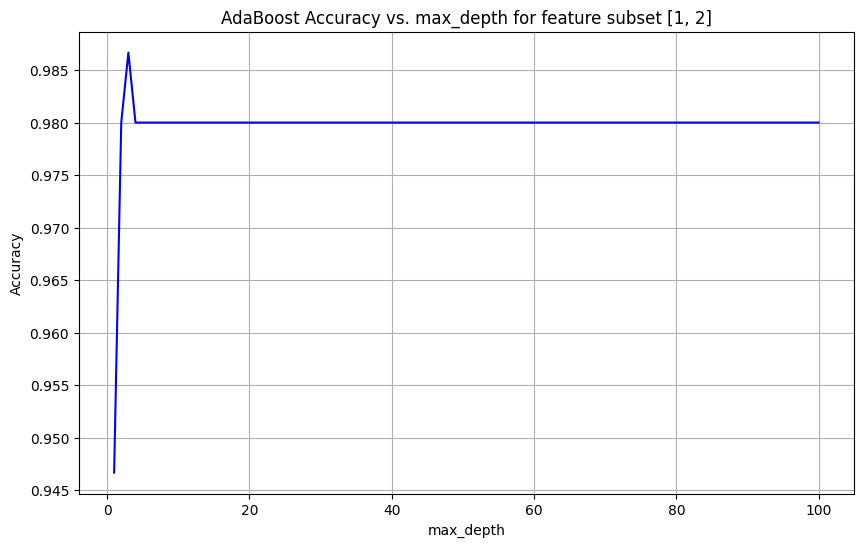

DecisionTree with features [1, 3] has a score of 0.98
RandomForest with 30 estimators with features [1, 3] has a score of 0.98
ExtraTrees with 30 estimators with features [1, 3] has a score of 0.98
Best max_depth for AdaBoost with feature subset [1, 3]: 2 with accuracy 0.98


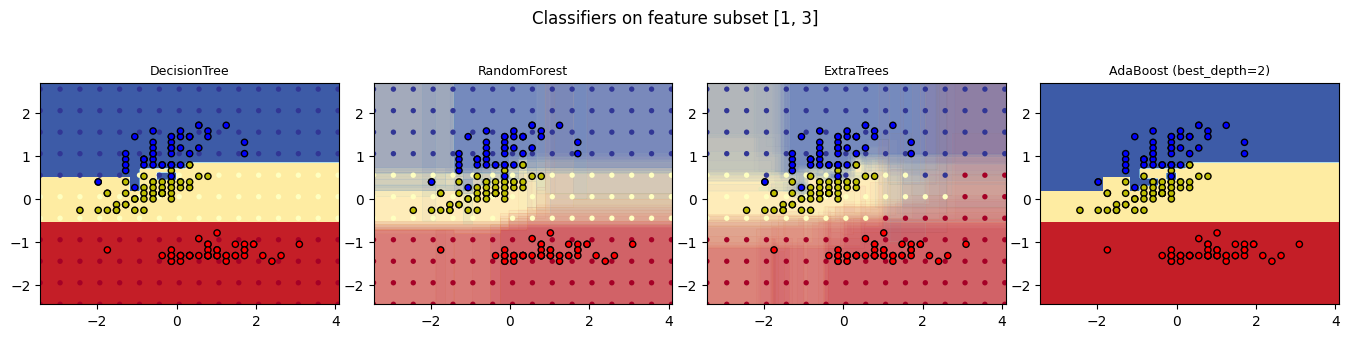

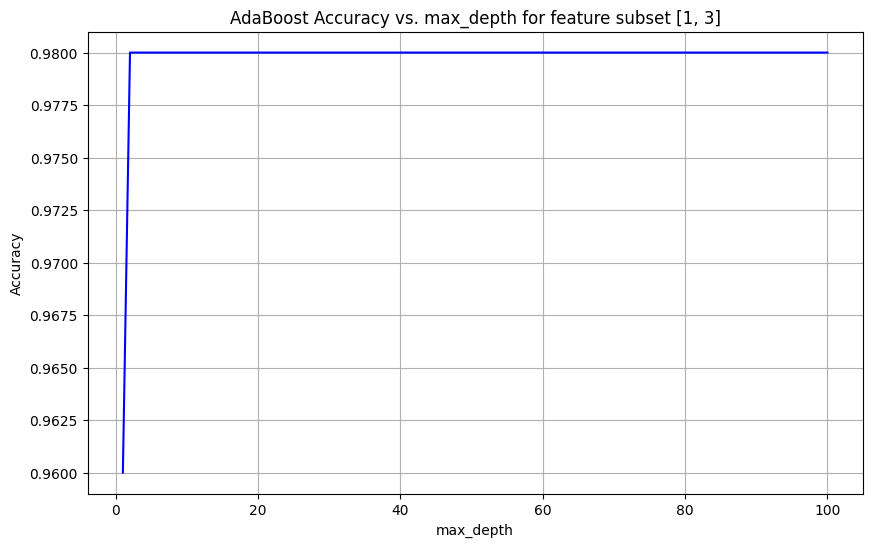

DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333
Best max_depth for AdaBoost with feature subset [2, 3]: 2 with accuracy 0.9933333333333333


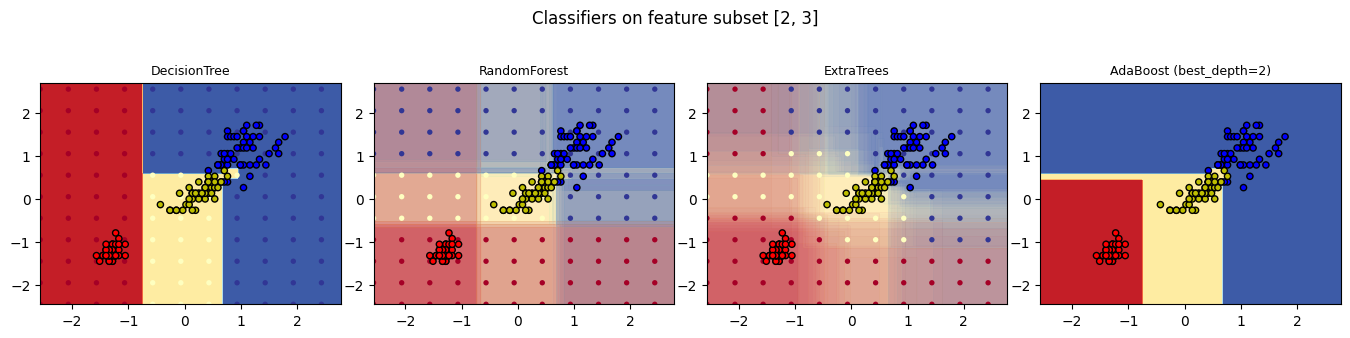

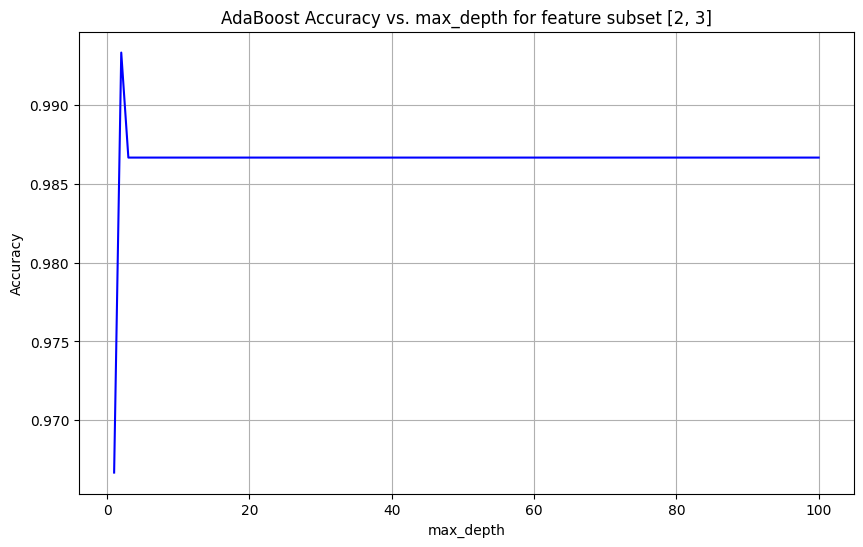

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration
max_depth_range = range(1, 101)  # Max depths for AdaBoost

# Load data
iris = load_iris()

# Initialize classifiers
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
]

for pair in ([0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]):
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Create a figure for the decision boundary plots
    plt.figure(figsize=(14, 16))
    plot_idx = 1

    for model in models:
        model.fit(X, y)
        scores = model.score(X, y)

        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(6, 4, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

    # AdaBoost: Find the best max_depth
    ada_scores = []
    best_score = 0
    best_depth = None

    for max_depth in max_depth_range:
        ada_model = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=max_depth),
            n_estimators=n_estimators,
            algorithm="SAMME",
        )
        ada_model.fit(X, y)
        score = ada_model.score(X, y)
        ada_scores.append(score)

        if score > best_score:
            best_score = score
            best_depth = max_depth

    print(f'Best max_depth for AdaBoost with feature subset {pair}: {best_depth} with accuracy {best_score}')

    # Retrain AdaBoost with the best max_depth
    ada_model_best = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=best_depth),
        n_estimators=n_estimators,
        algorithm="SAMME",
    )
    ada_model_best.fit(X, y)

    # Add AdaBoost to the plot
    plt.subplot(6, 4, plot_idx)
    plt.title(f'AdaBoost (best_depth={best_depth})', fontsize=9)

    Z = ada_model_best.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=ListedColormap(["r", "y", "b"]),
        edgecolor="k",
        s=20,
    )

    plt.suptitle(f"Classifiers on feature subset {pair}", fontsize=12)
    plt.axis("tight")
    plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
    plt.show()

    # Plot the performance of AdaBoost with different max_depth values
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, ada_scores, linestyle='-', color='b')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title(f'AdaBoost Accuracy vs. max_depth for feature subset {pair}')
    plt.grid(True)
    plt.show()


#Vary n_estimators

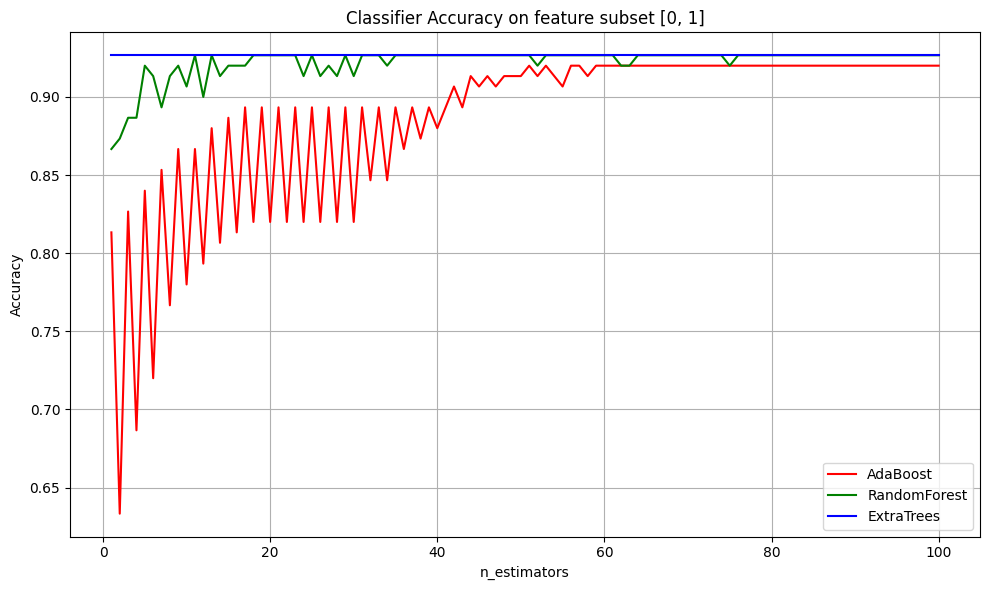

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 11 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 1 estimators with features [0, 1] has a score of 0.9266666666666666
Best n_estimators for AdaBoost with feature subset [0, 1]: 51 with accuracy 0.92


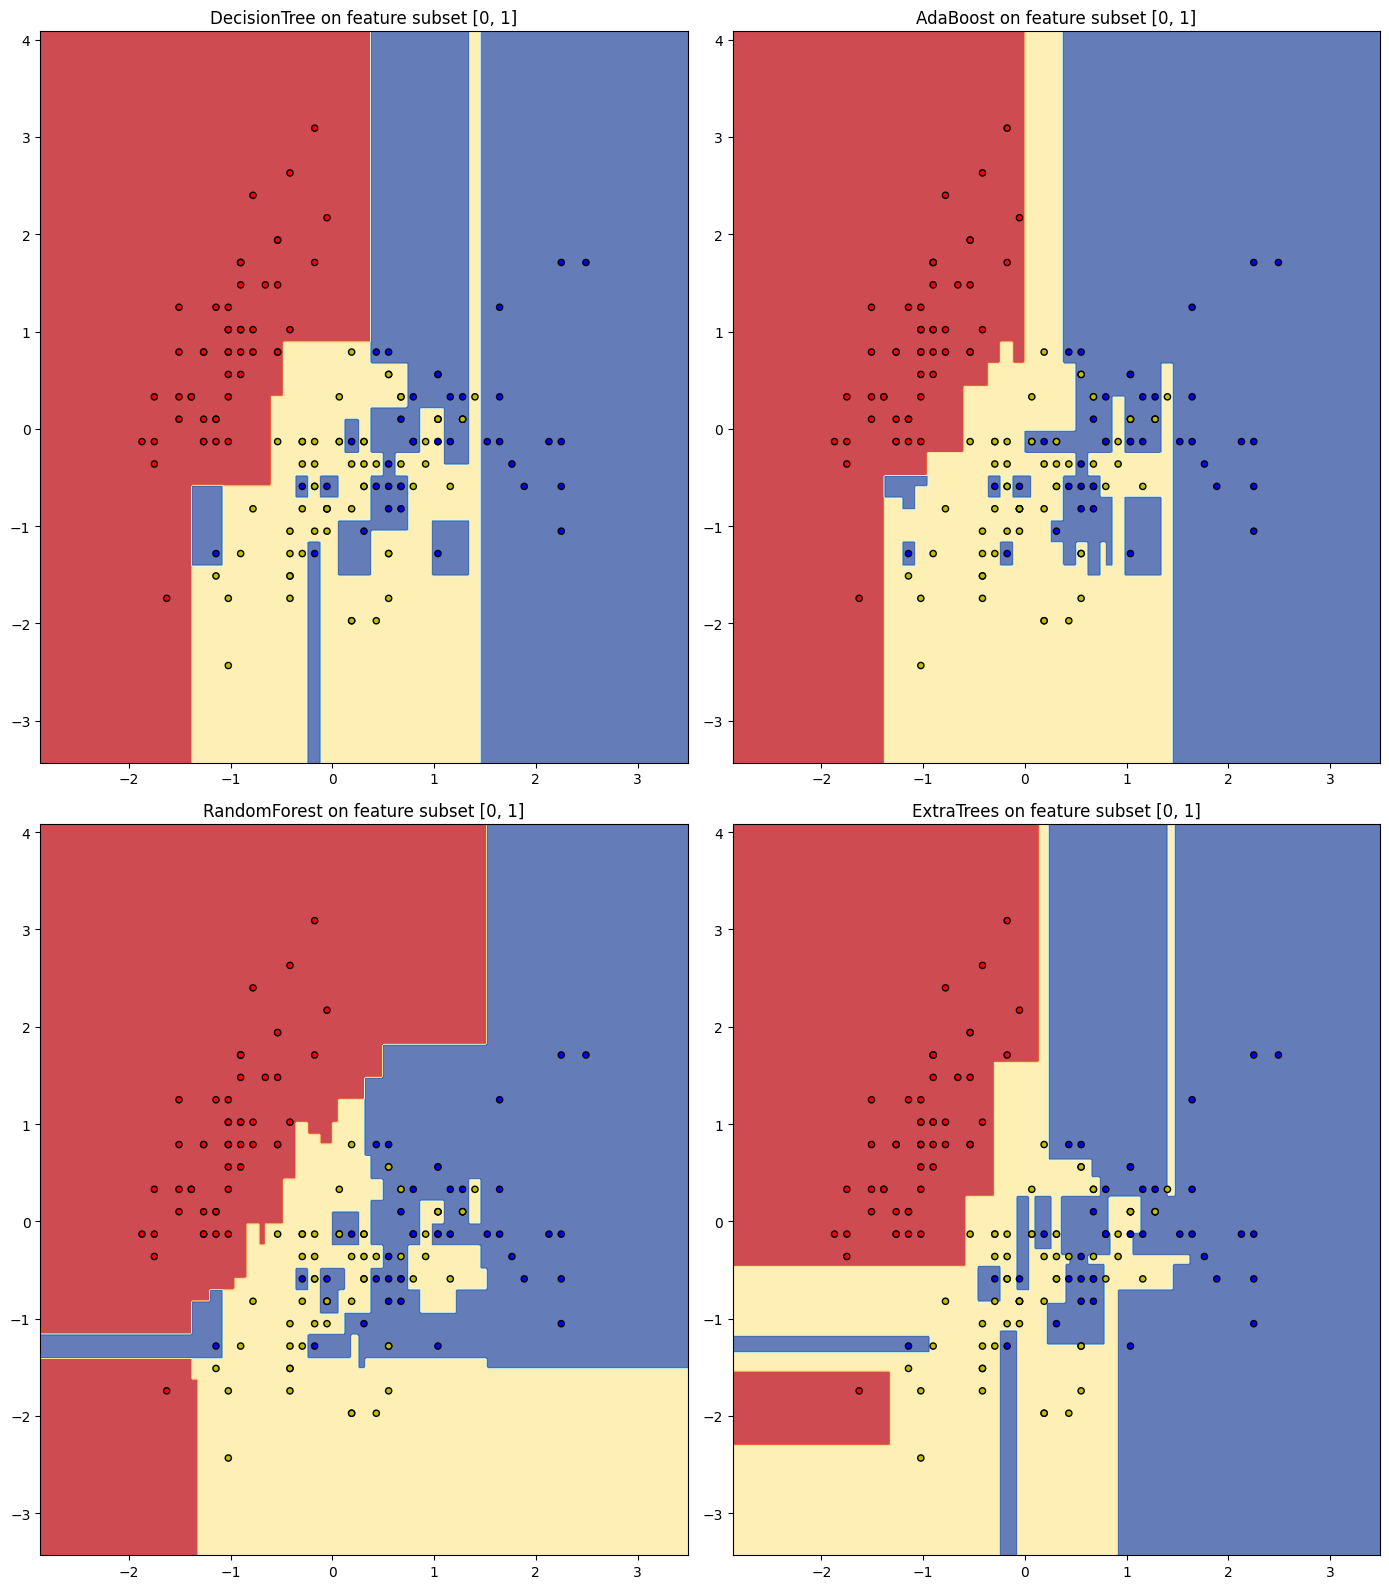

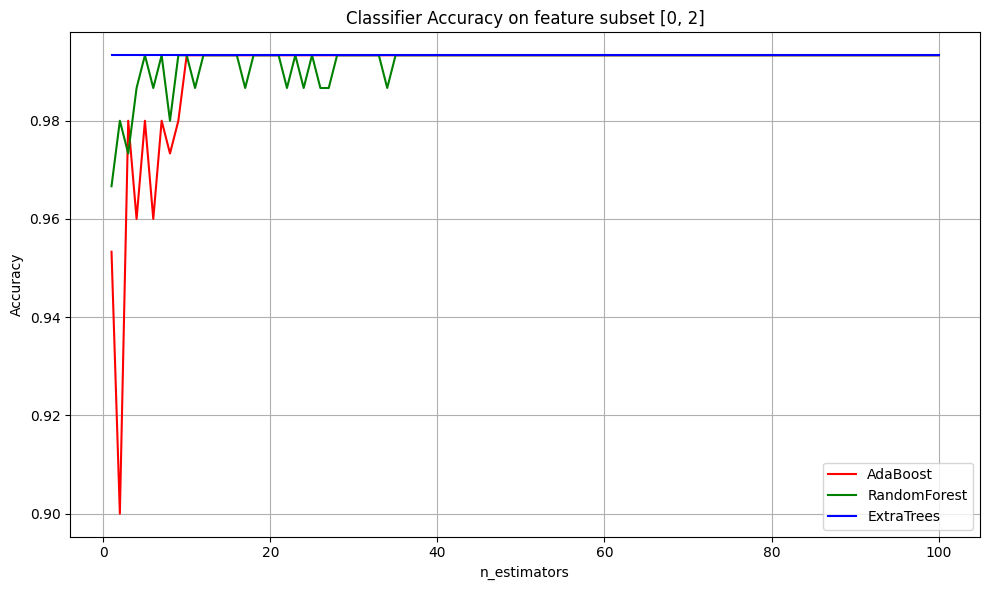

DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 5 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 1 estimators with features [0, 2] has a score of 0.9933333333333333
Best n_estimators for AdaBoost with feature subset [0, 2]: 10 with accuracy 0.9933333333333333


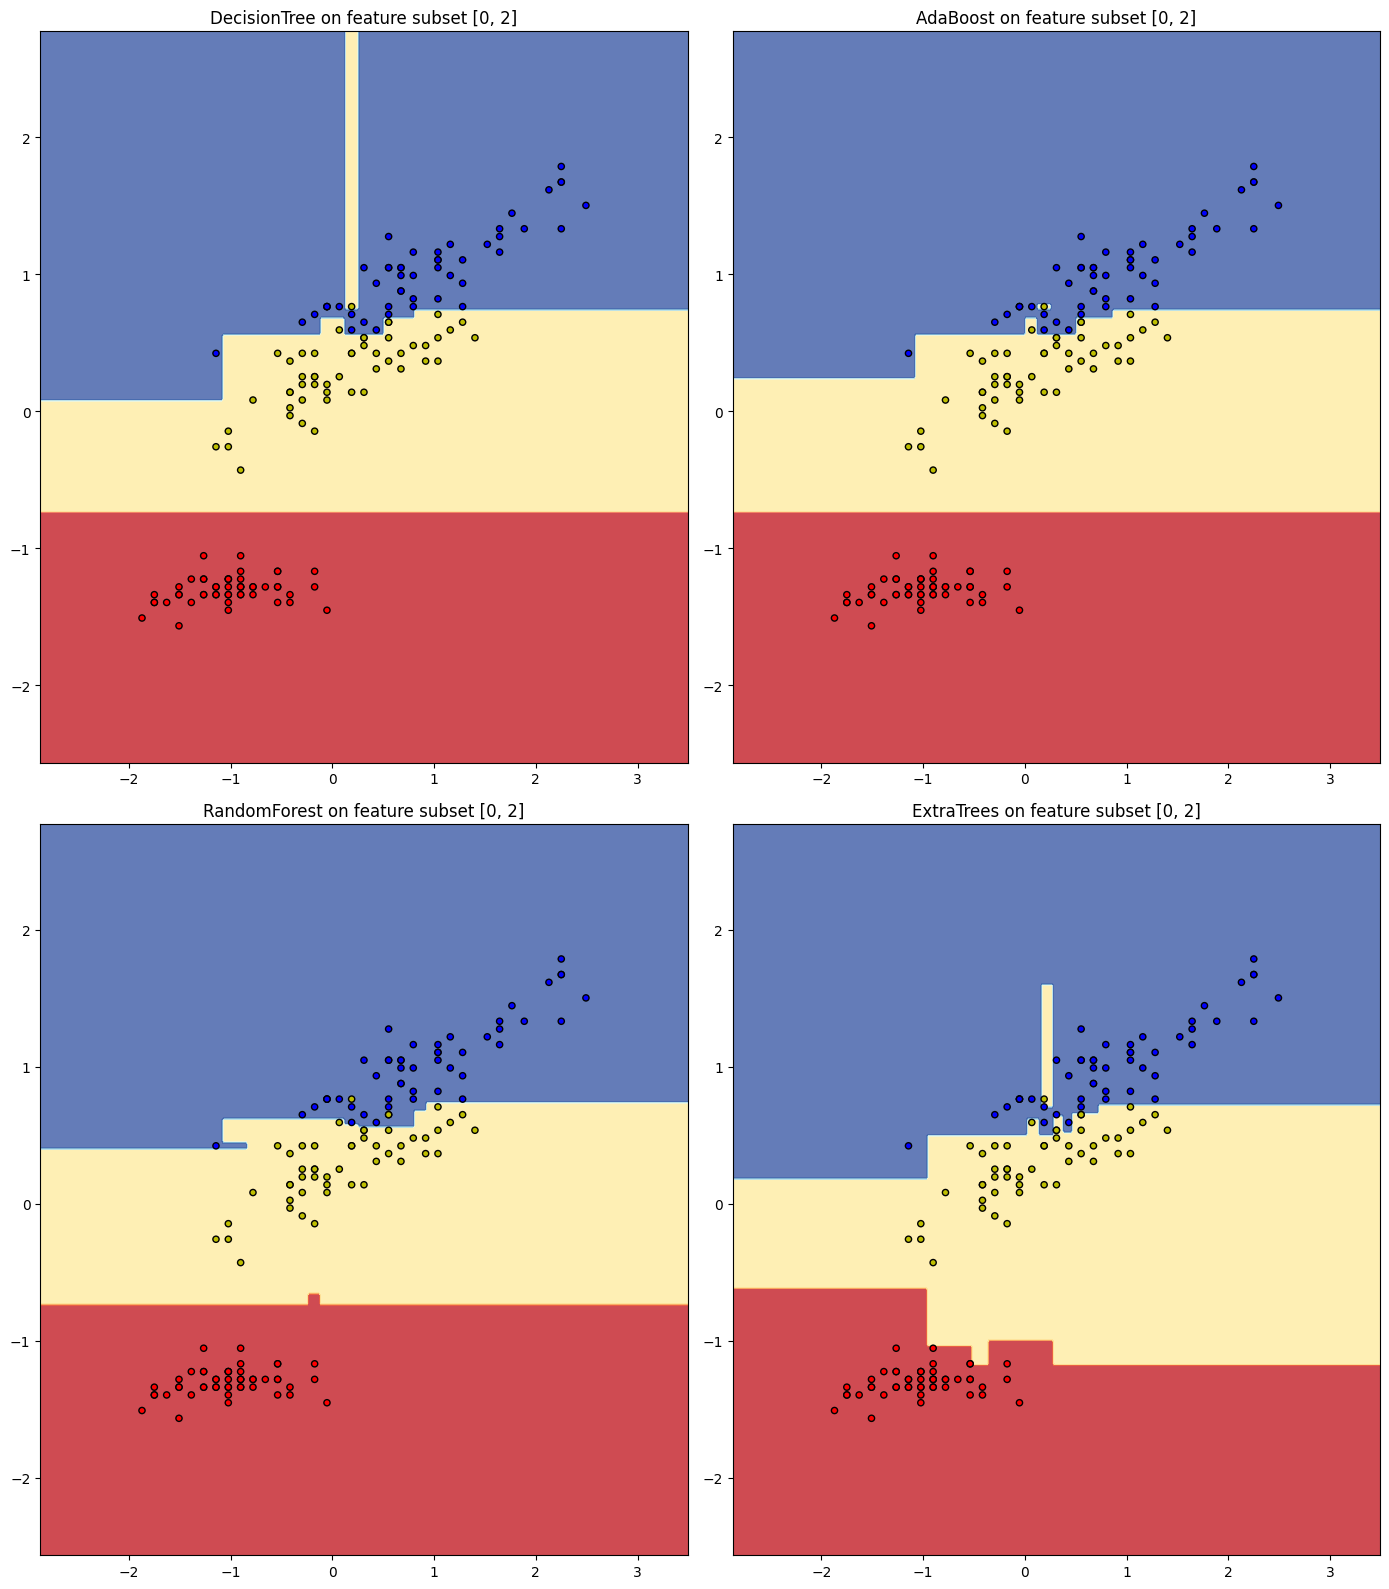

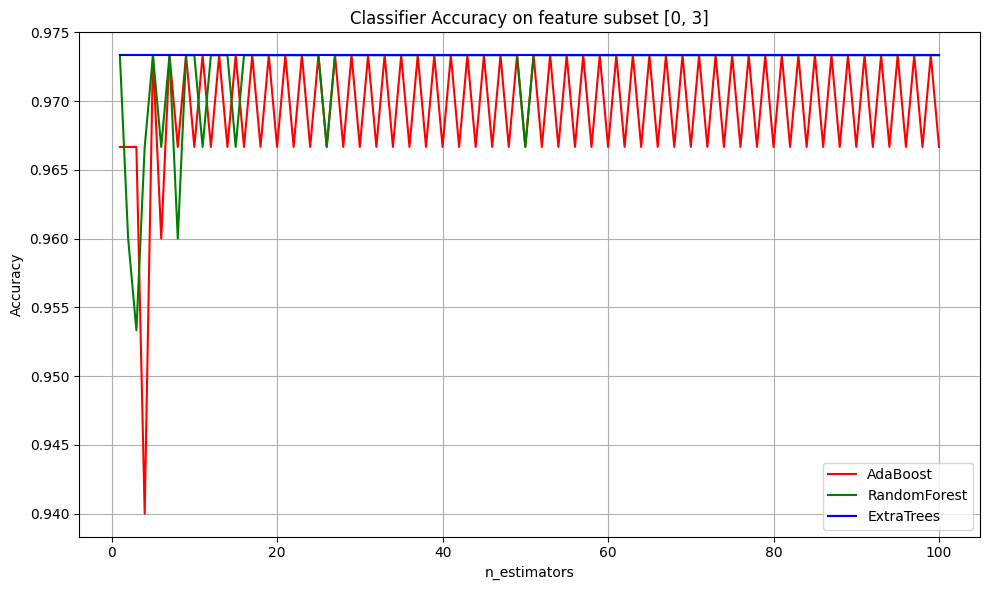

DecisionTree with features [0, 3] has a score of 0.9733333333333334
RandomForest with 1 estimators with features [0, 3] has a score of 0.9733333333333334
ExtraTrees with 1 estimators with features [0, 3] has a score of 0.9733333333333334
Best n_estimators for AdaBoost with feature subset [0, 3]: 5 with accuracy 0.9733333333333334


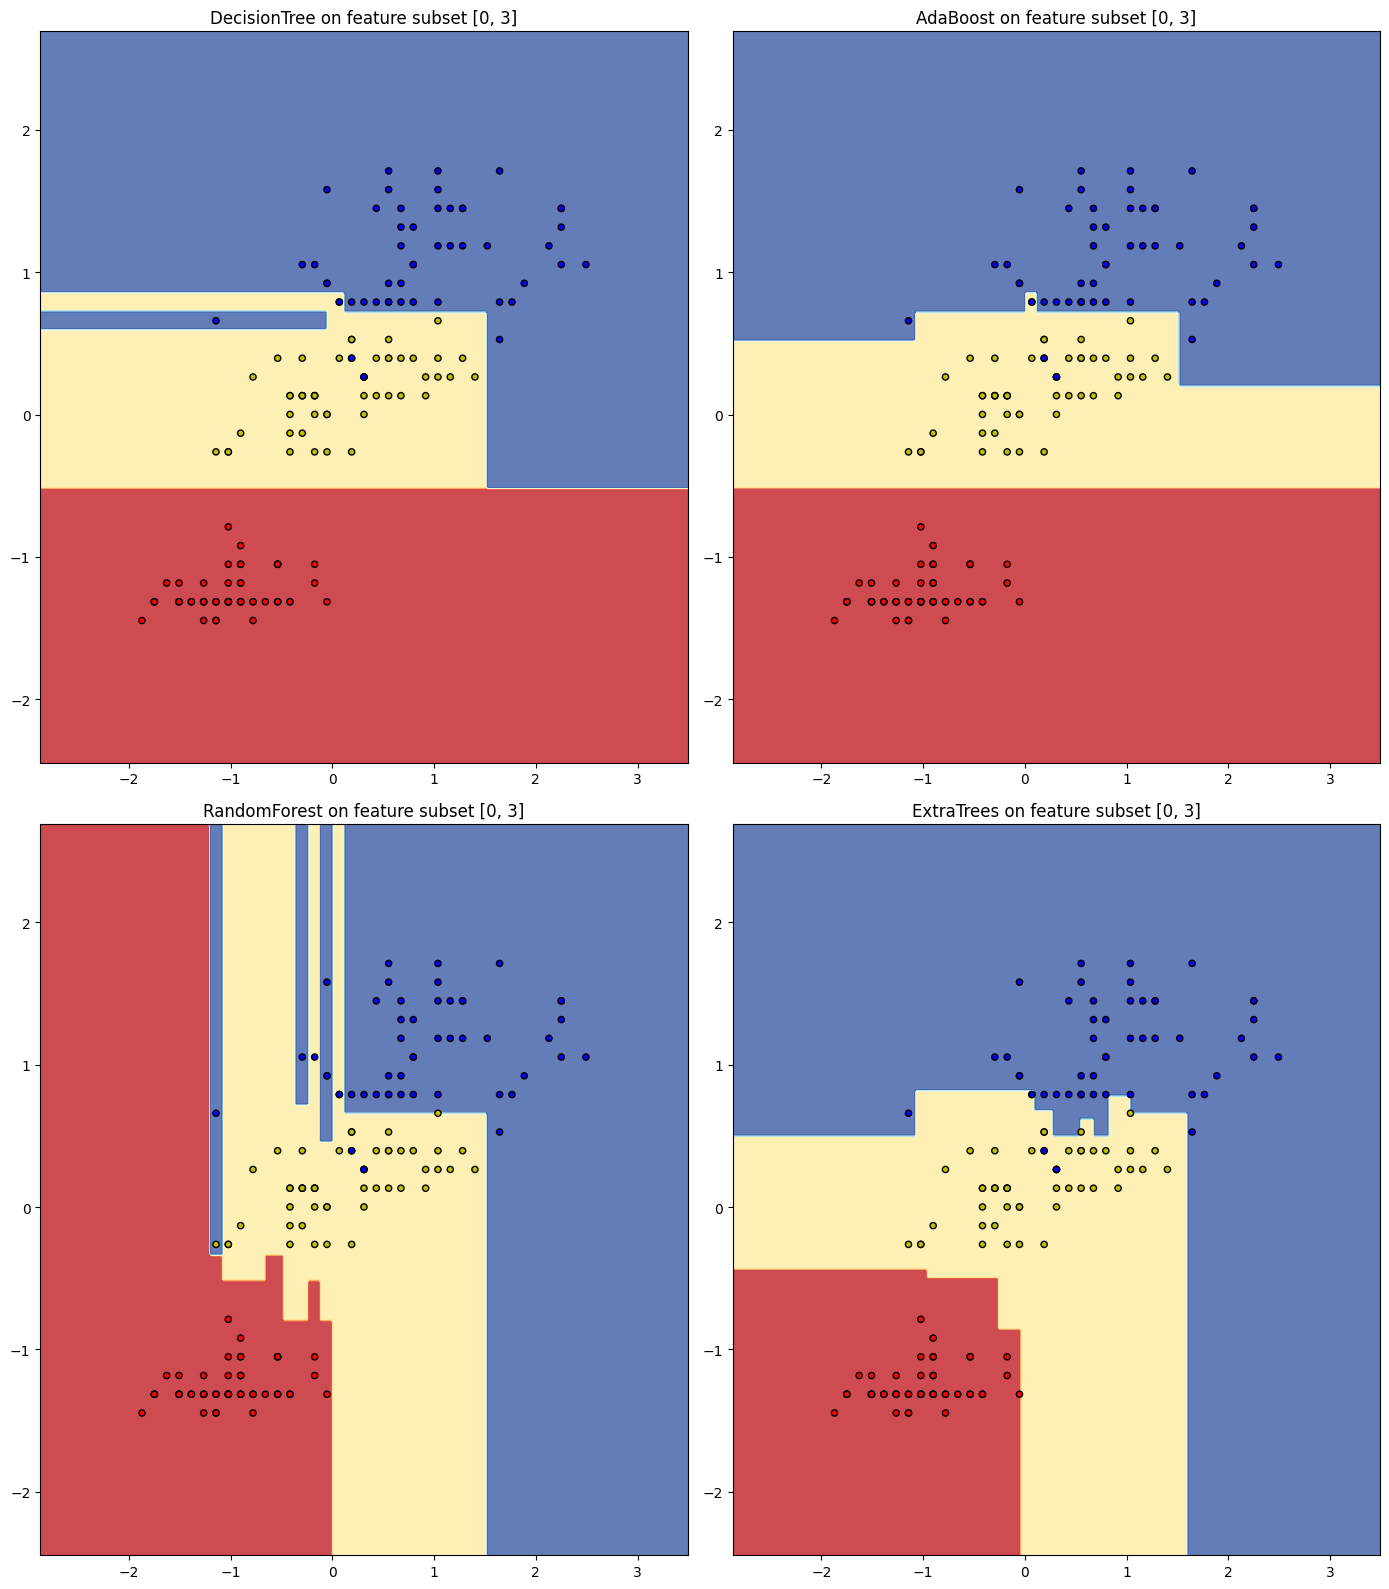

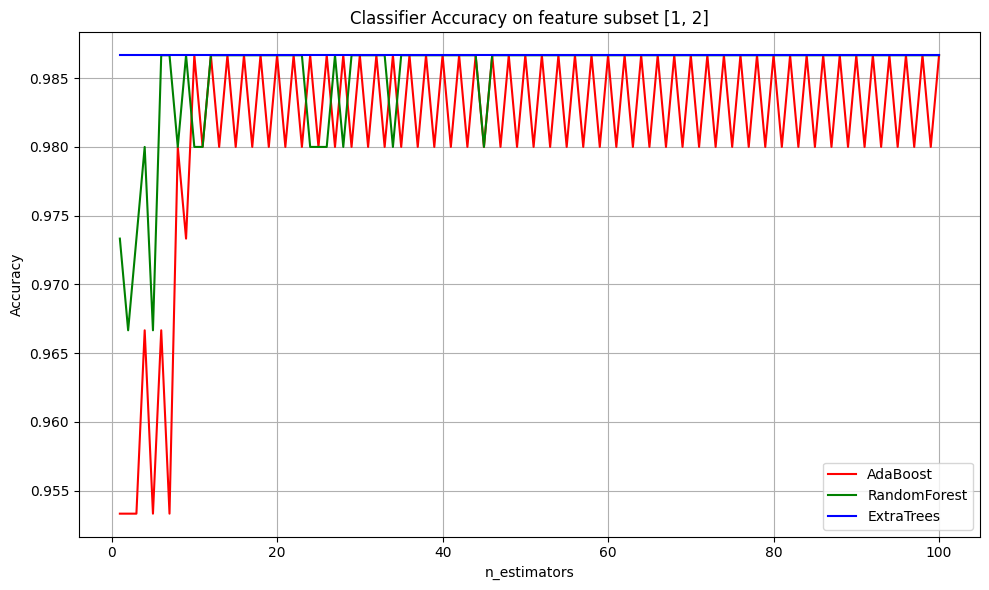

DecisionTree with features [1, 2] has a score of 0.9866666666666667
RandomForest with 6 estimators with features [1, 2] has a score of 0.9866666666666667
ExtraTrees with 1 estimators with features [1, 2] has a score of 0.9866666666666667
Best n_estimators for AdaBoost with feature subset [1, 2]: 10 with accuracy 0.9866666666666667


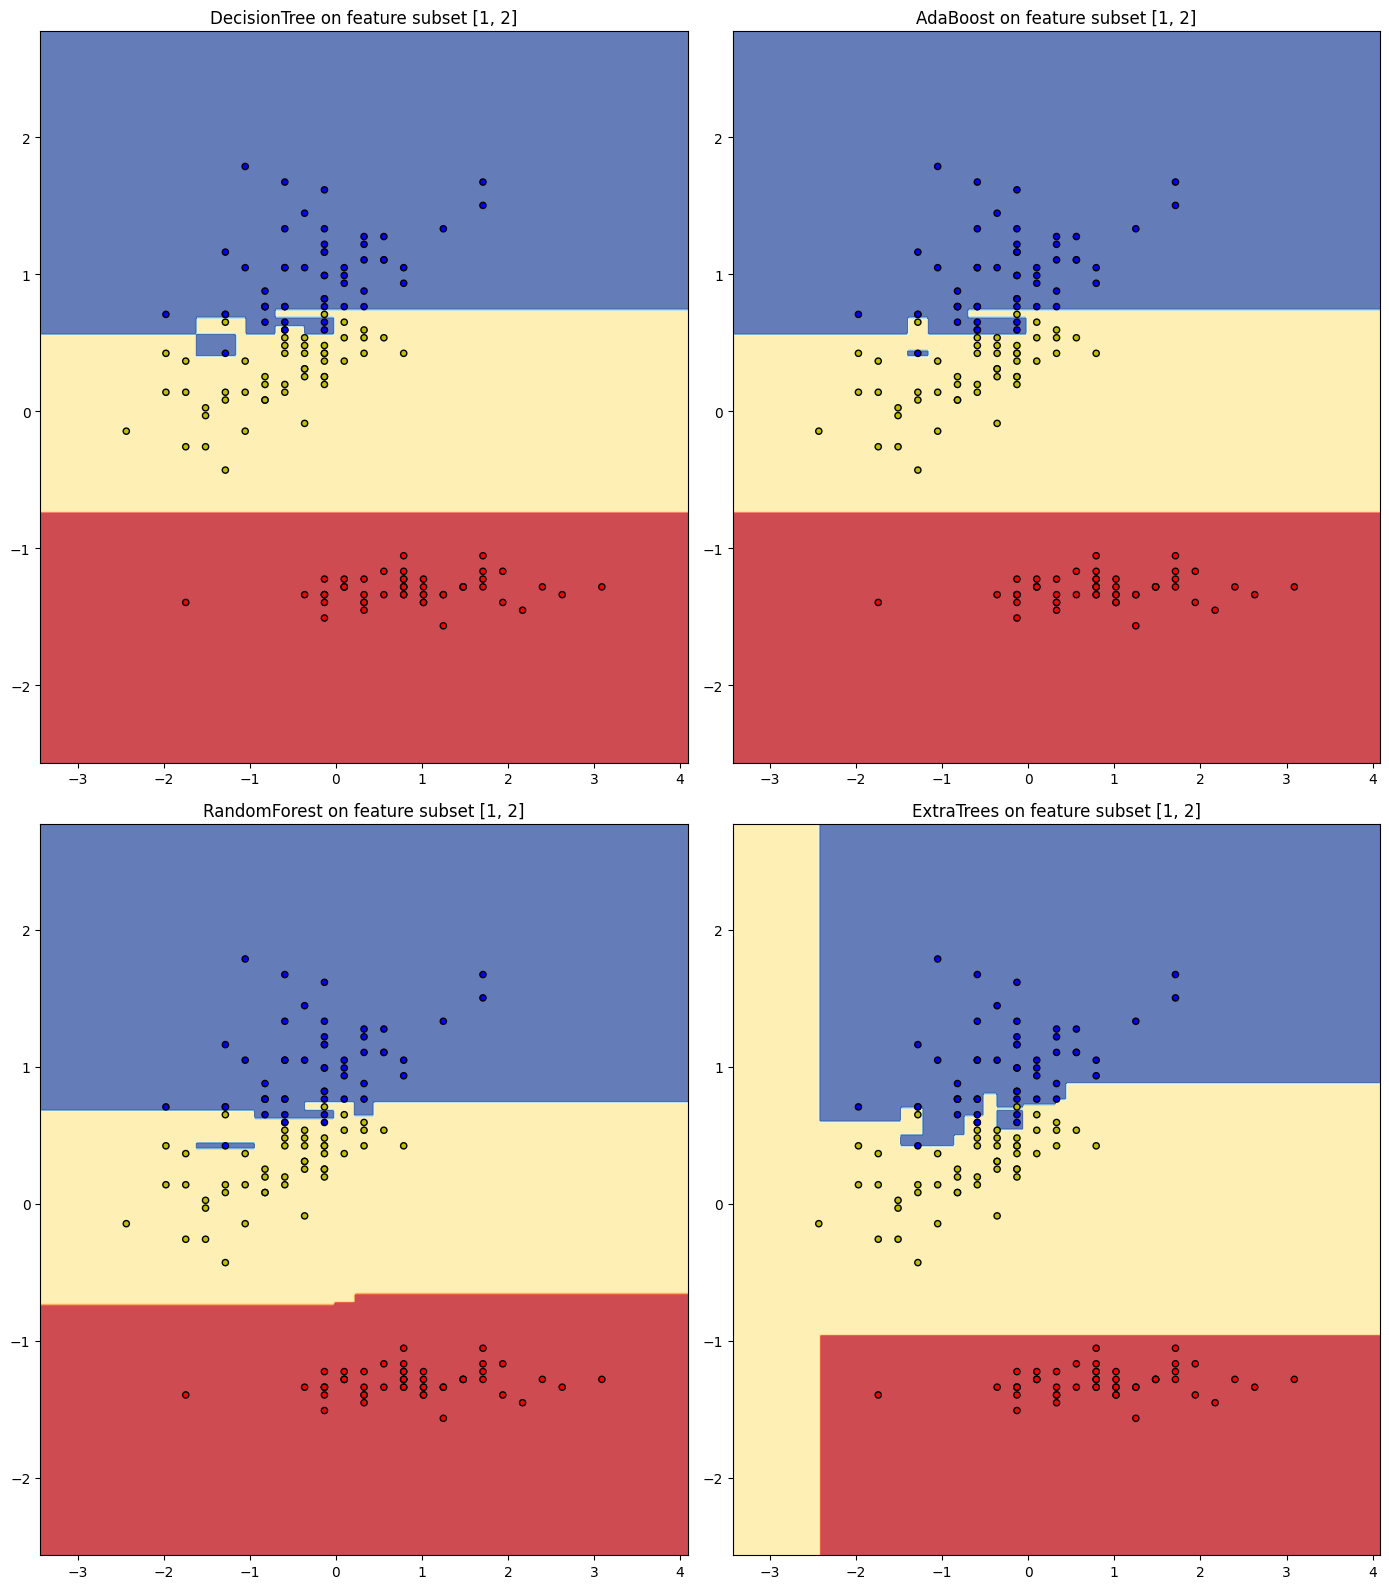

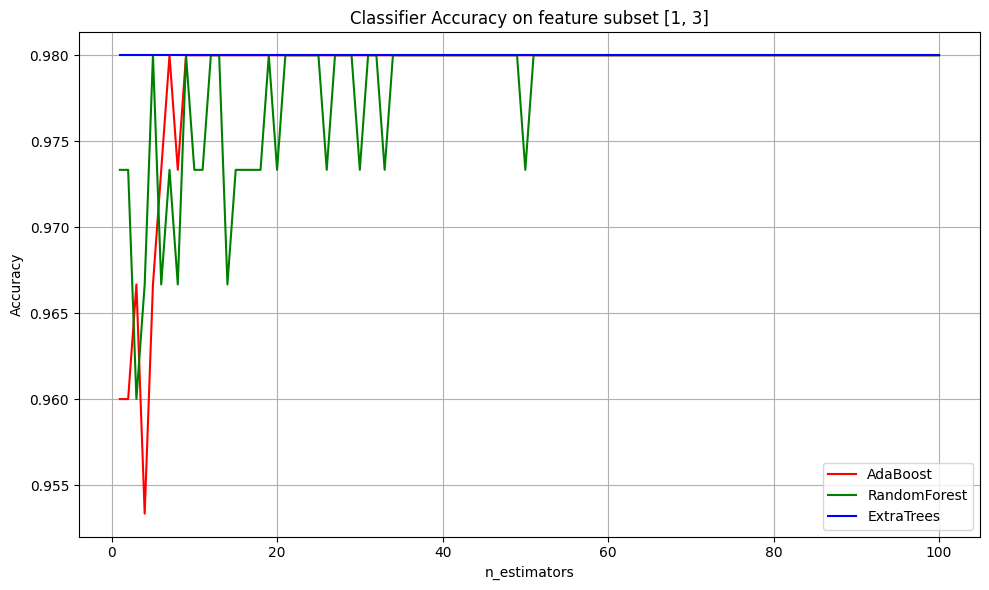

DecisionTree with features [1, 3] has a score of 0.98
RandomForest with 5 estimators with features [1, 3] has a score of 0.98
ExtraTrees with 1 estimators with features [1, 3] has a score of 0.98
Best n_estimators for AdaBoost with feature subset [1, 3]: 7 with accuracy 0.98


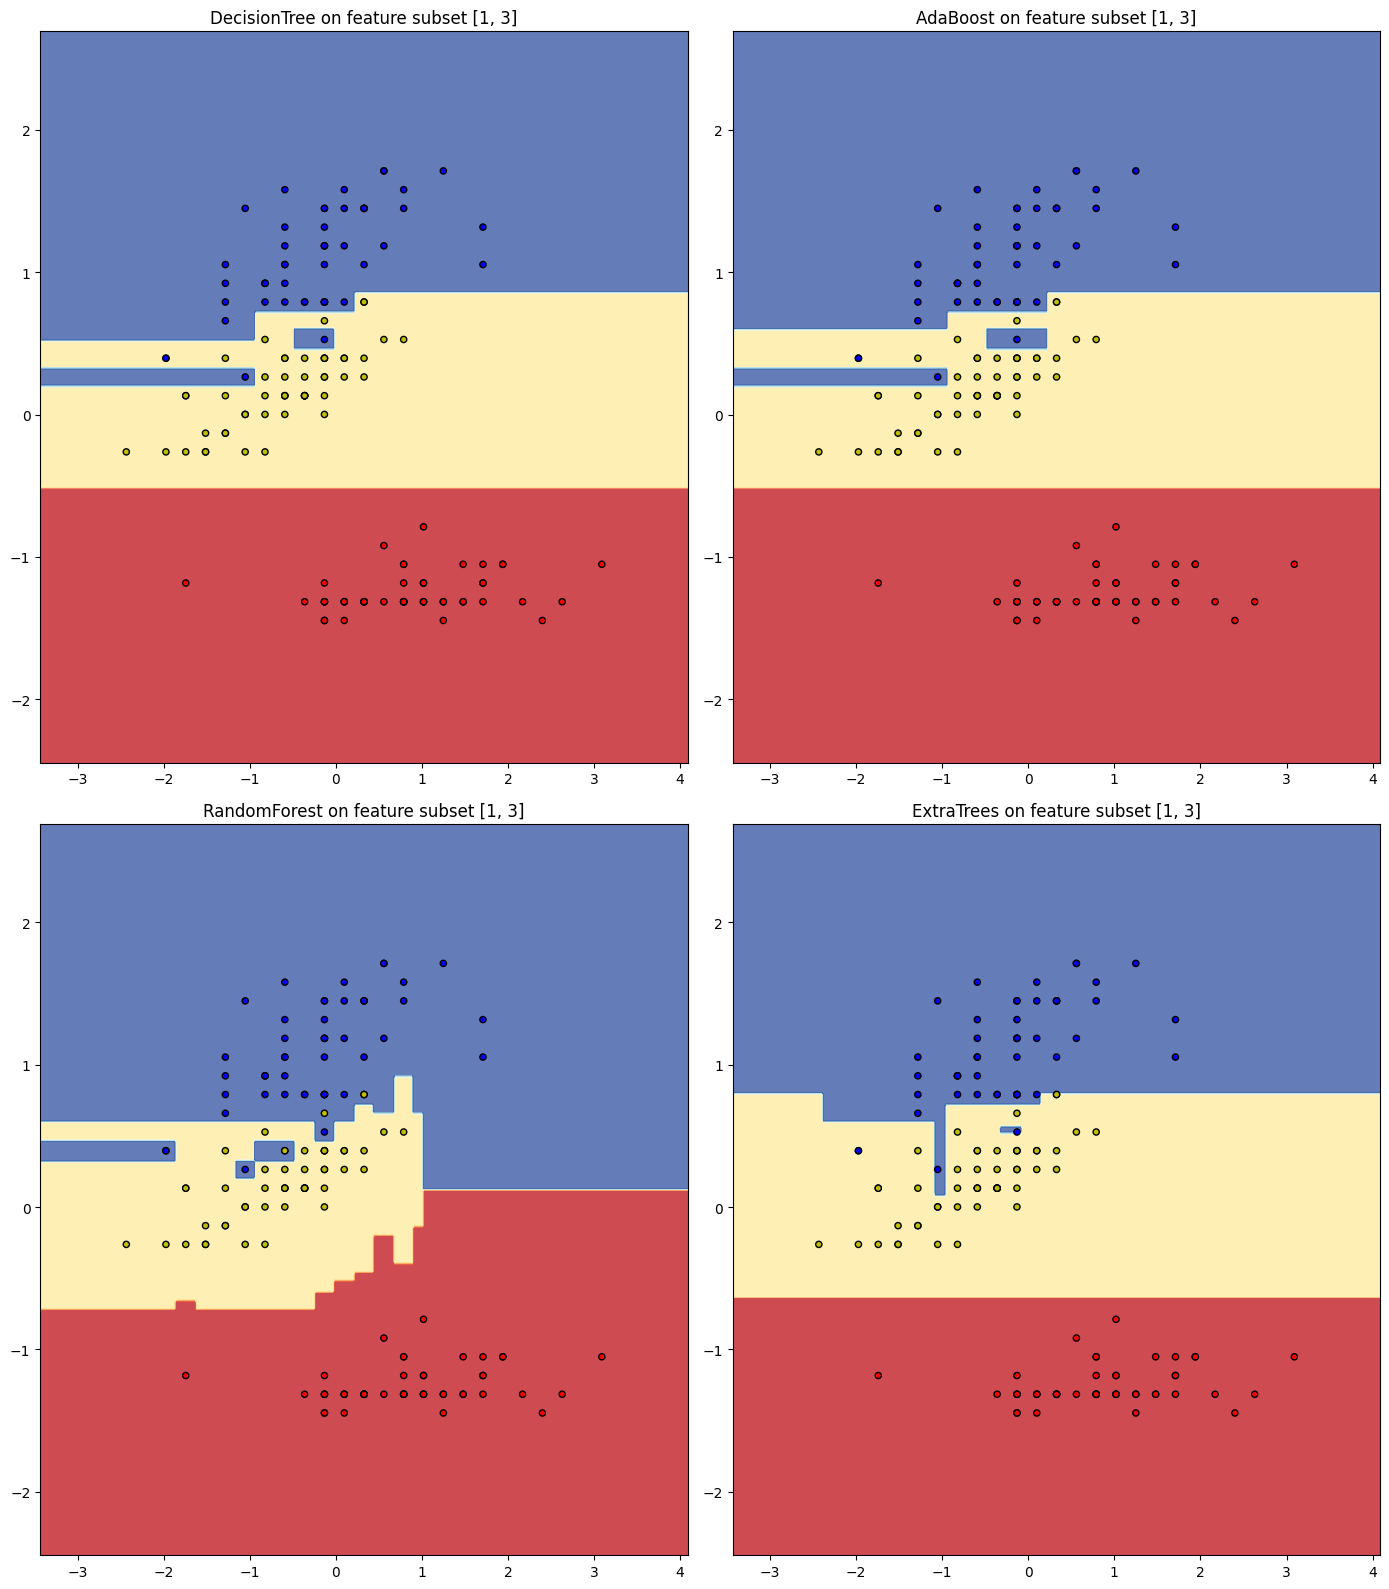

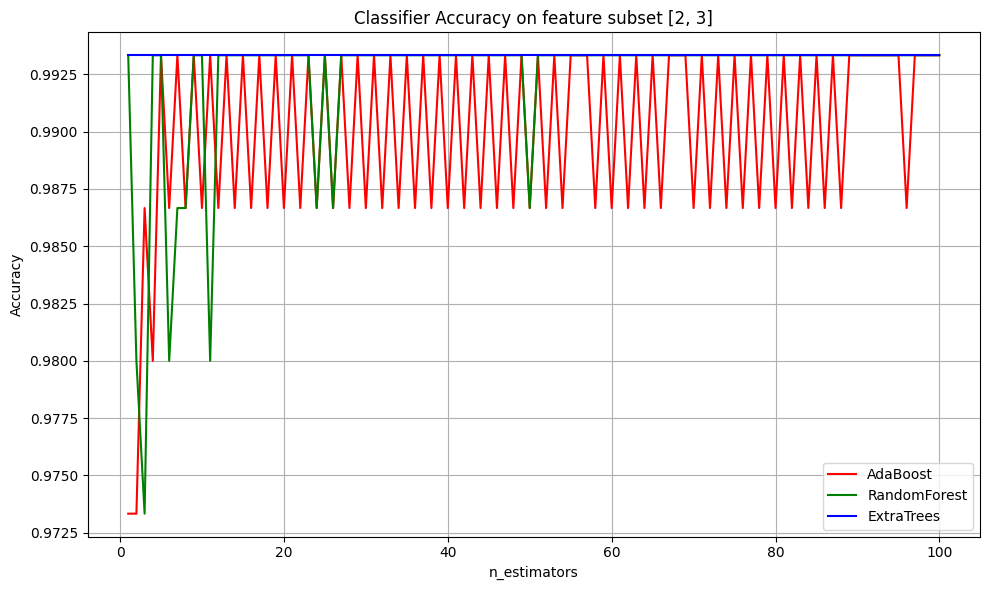

DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 1 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 1 estimators with features [2, 3] has a score of 0.9933333333333333
Best n_estimators for AdaBoost with feature subset [2, 3]: 5 with accuracy 0.9933333333333333


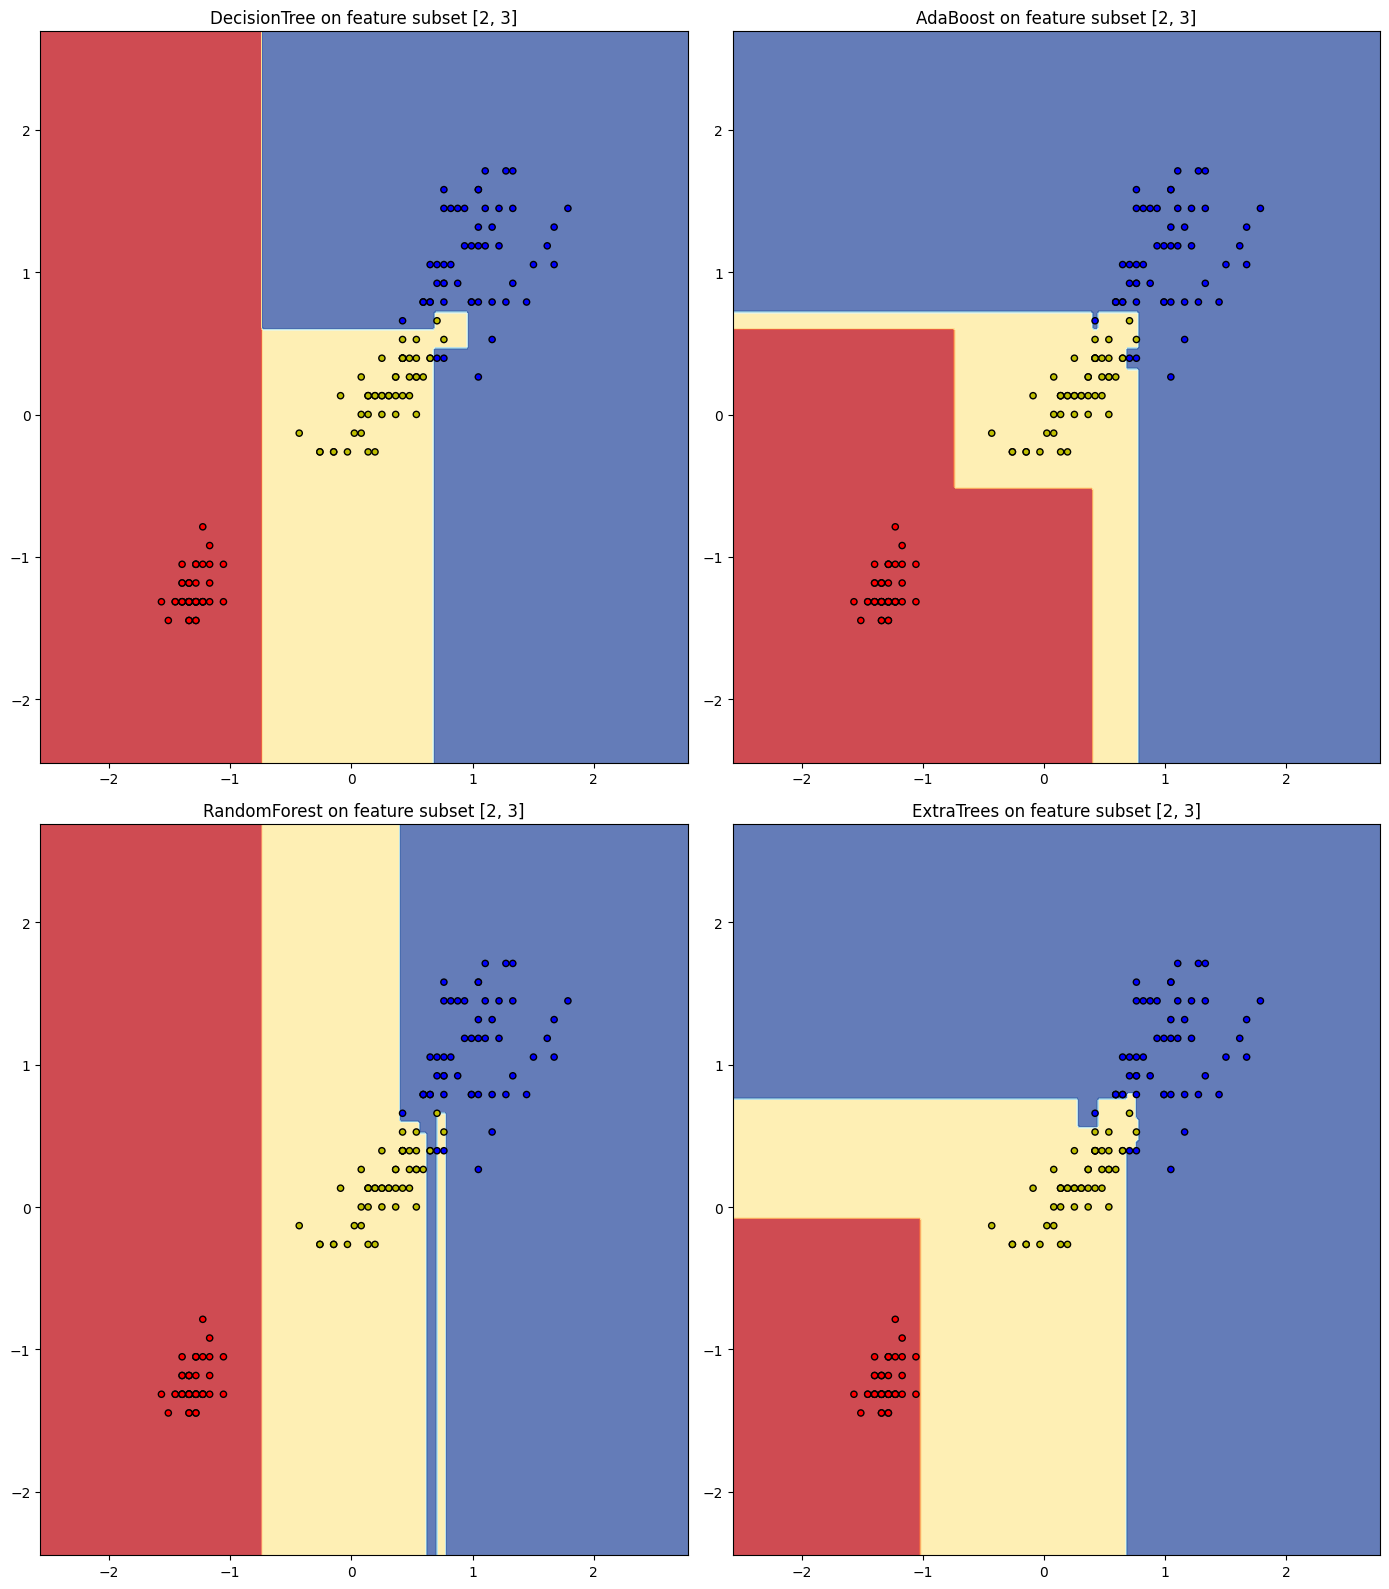

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Parameters
n_estimators_range = range(1, 101)
max_depth_fixed = 3  # Fixed max_depth for AdaBoost
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

# Load data
iris = load_iris()
cmap = plt.cm.RdYlBu

for pair in ([0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]):
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Test different n_estimators for AdaBoost
    ada_scores = []
    for n_estimators in n_estimators_range:
        ada_model = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=max_depth_fixed),
            n_estimators=n_estimators,
            algorithm="SAMME",
        )
        ada_model.fit(X, y)
        ada_scores.append(ada_model.score(X, y))

    # Test different n_estimators for RandomForestClassifier
    rf_scores = []
    for n_estimators in n_estimators_range:
        rf_model = RandomForestClassifier(n_estimators=n_estimators)
        rf_model.fit(X, y)
        rf_scores.append(rf_model.score(X, y))

    # Test different n_estimators for ExtraTreesClassifier
    et_scores = []
    for n_estimators in n_estimators_range:
        et_model = ExtraTreesClassifier(n_estimators=n_estimators)
        et_model.fit(X, y)
        et_scores.append(et_model.score(X, y))

    # Create a figure for the accuracy plots of all three classifiers
    plt.figure(figsize=(10, 6))

    # Plot AdaBoost accuracy
    plt.plot(n_estimators_range, ada_scores, label='AdaBoost', color='r')

    # Plot RandomForest accuracy
    plt.plot(n_estimators_range, rf_scores, label='RandomForest', color='g')

    # Plot ExtraTrees accuracy
    plt.plot(n_estimators_range, et_scores, label='ExtraTrees', color='b')

    # Configure plot
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title(f'Classifier Accuracy on feature subset {pair}')
    plt.legend(loc='best')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Find the best n_estimators for each classifier
    best_rf_n = np.argmax(rf_scores) + 1
    best_et_n = np.argmax(et_scores) + 1
    best_ada_n = np.argmax(ada_scores) + 1

    # Print results
    print(f"DecisionTree with features {pair} has a score of {DecisionTreeClassifier().fit(X, y).score(X, y)}")
    print(f"RandomForest with {best_rf_n} estimators with features {pair} has a score of {max(rf_scores)}")
    print(f"ExtraTrees with {best_et_n} estimators with features {pair} has a score of {max(et_scores)}")
    print(f"Best n_estimators for AdaBoost with feature subset {pair}: {best_ada_n} with accuracy {max(ada_scores)}")

    # Plot decision boundaries using the best n_estimators for each classifier
    classifiers = {
        "DecisionTree": DecisionTreeClassifier(max_depth=None),
        "AdaBoost": AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=max_depth_fixed),
            n_estimators=best_ada_n,  # Use best n_estimators
            algorithm="SAMME",
        ),
        "RandomForest": RandomForestClassifier(n_estimators=best_rf_n),
        "ExtraTrees": ExtraTreesClassifier(n_estimators=best_et_n),
    }

    plt.figure(figsize=(14, 16))
    plot_idx = 1

    for model_name, model in classifiers.items():
        model.fit(X, y)
        plt.subplot(2, 2, plot_idx)
        plt.title(f"{model_name} on feature subset {pair}")

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", "y", "b"]), edgecolor="k", s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

        plot_idx += 1

    plt.tight_layout()
    plt.show()


##從estimator的輸出可以發現estimator在100的準確度不管是哪一個特徵對特徵都有較好的準確度，所以這邊直接使用estimator=100再進行max-depth的比較

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 100 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 100 estimators with features [0, 1] has a score of 0.9266666666666666
Best max_depth for AdaBoost with feature subset [0, 1]: 8 with accuracy 0.9266666666666666


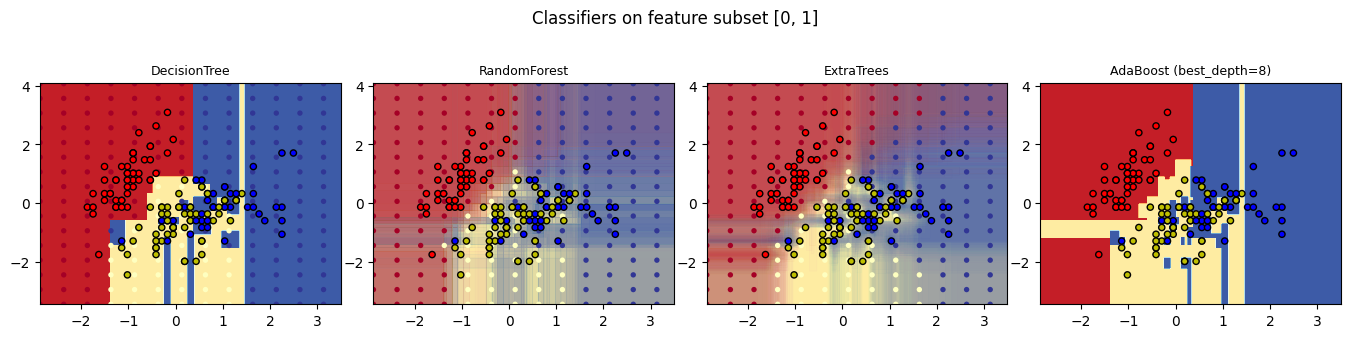

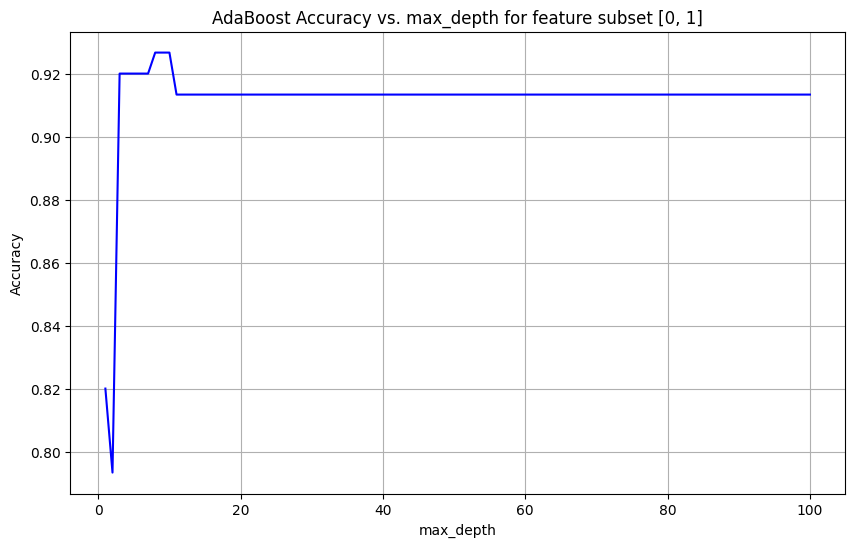

DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 100 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 100 estimators with features [0, 2] has a score of 0.9933333333333333
Best max_depth for AdaBoost with feature subset [0, 2]: 2 with accuracy 0.9933333333333333


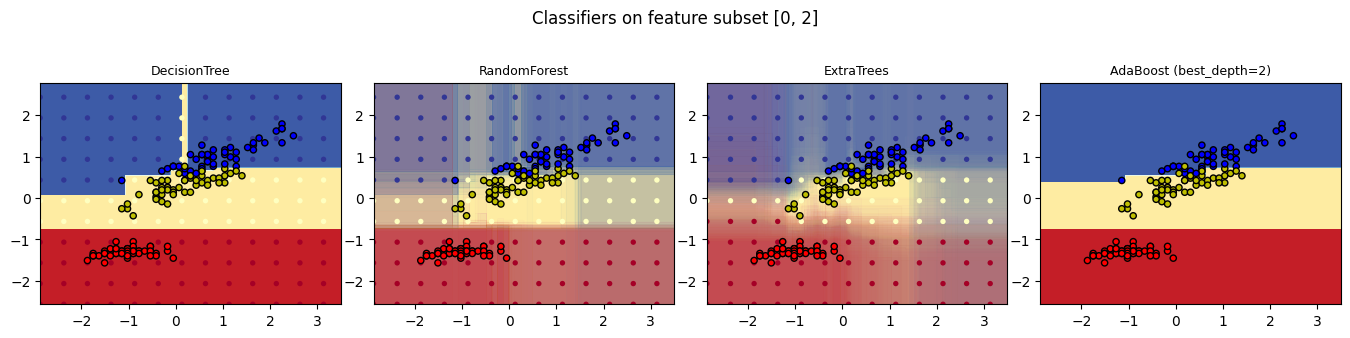

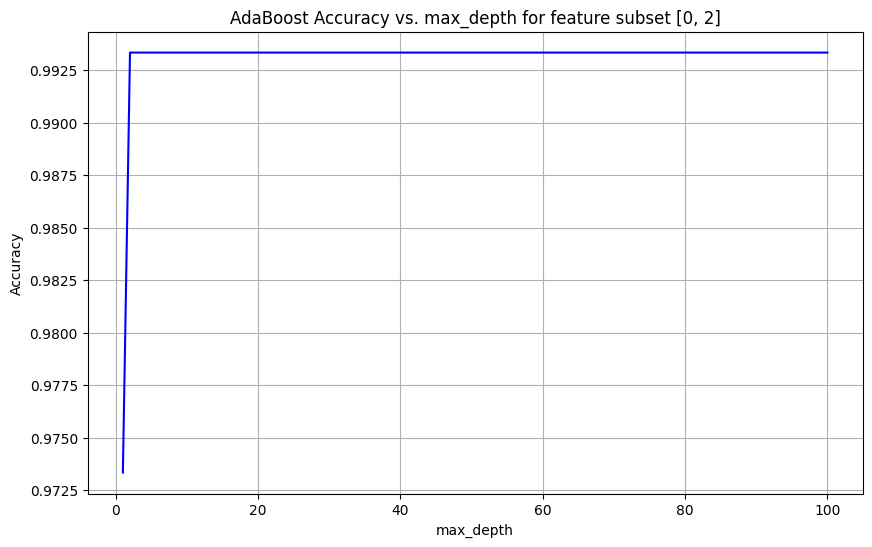

DecisionTree with features [0, 3] has a score of 0.9733333333333334
RandomForest with 100 estimators with features [0, 3] has a score of 0.9733333333333334
ExtraTrees with 100 estimators with features [0, 3] has a score of 0.9733333333333334
Best max_depth for AdaBoost with feature subset [0, 3]: 2 with accuracy 0.9733333333333334


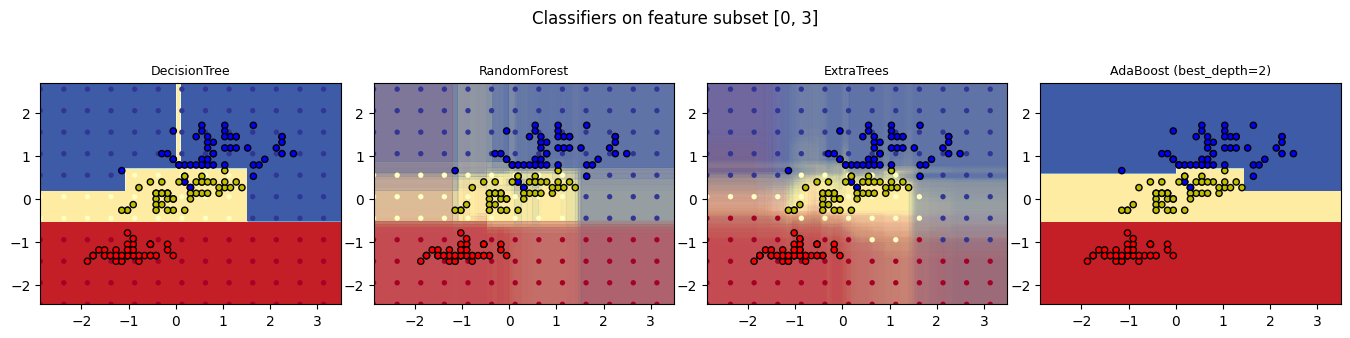

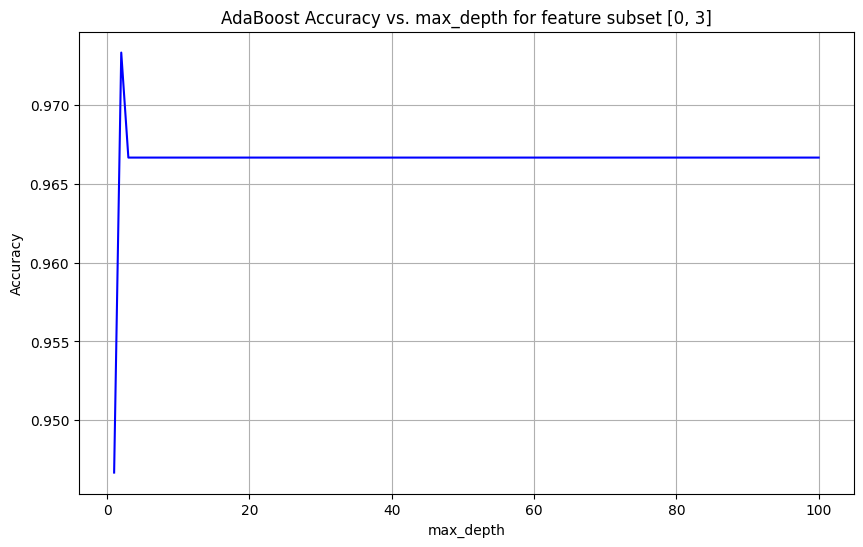

DecisionTree with features [1, 2] has a score of 0.9866666666666667
RandomForest with 100 estimators with features [1, 2] has a score of 0.9866666666666667
ExtraTrees with 100 estimators with features [1, 2] has a score of 0.9866666666666667
Best max_depth for AdaBoost with feature subset [1, 2]: 3 with accuracy 0.9866666666666667


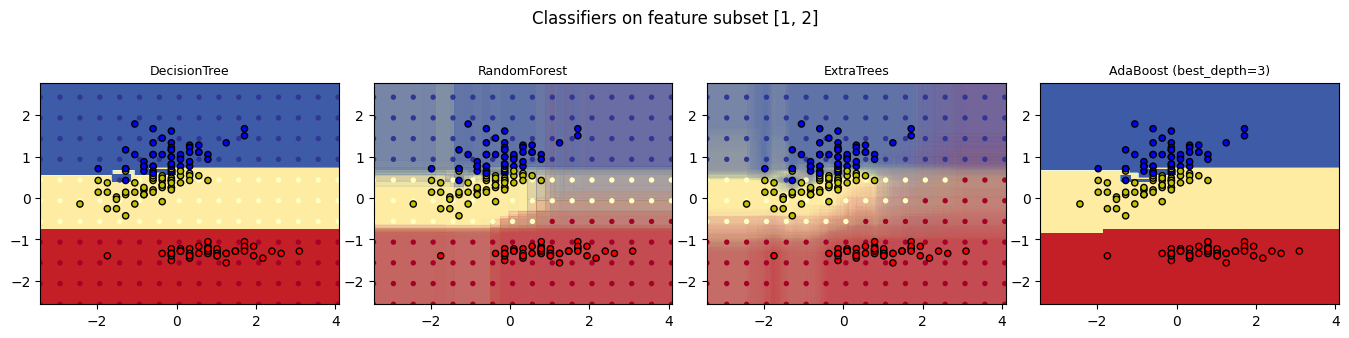

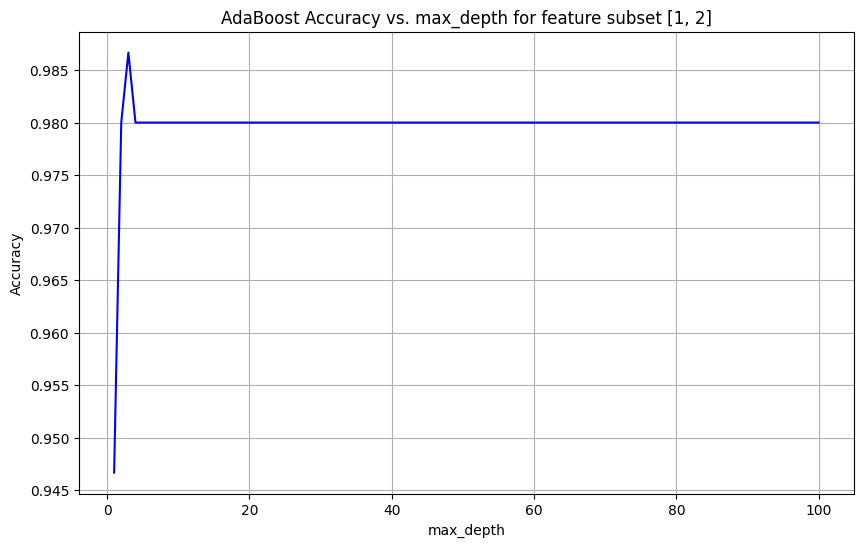

DecisionTree with features [1, 3] has a score of 0.98
RandomForest with 100 estimators with features [1, 3] has a score of 0.98
ExtraTrees with 100 estimators with features [1, 3] has a score of 0.98
Best max_depth for AdaBoost with feature subset [1, 3]: 2 with accuracy 0.98


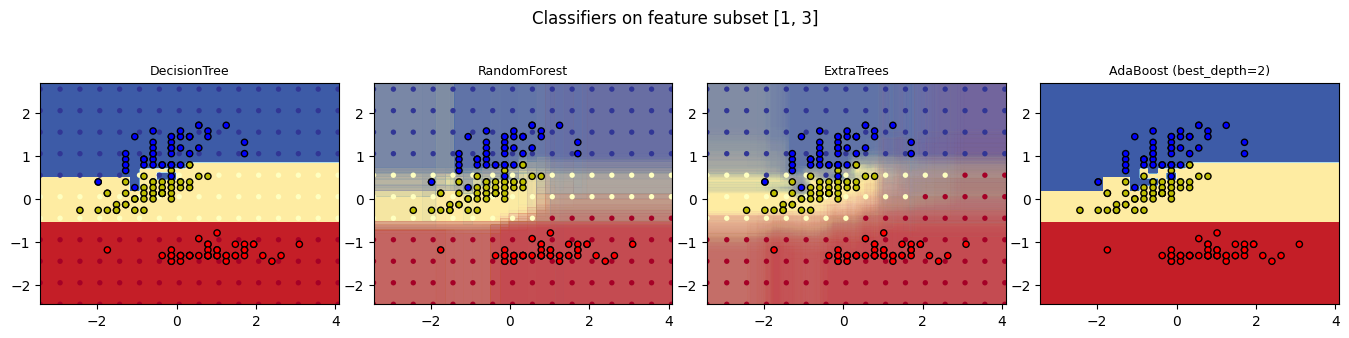

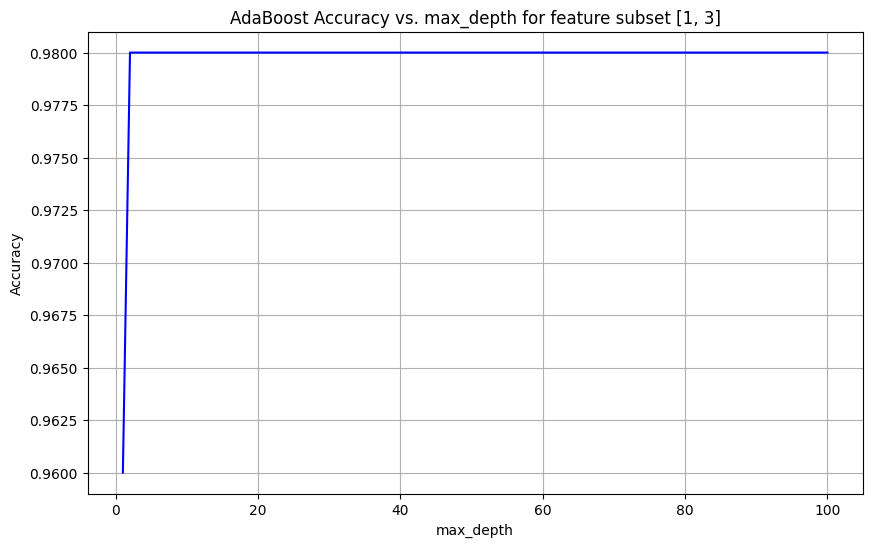

DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 100 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 100 estimators with features [2, 3] has a score of 0.9933333333333333
Best max_depth for AdaBoost with feature subset [2, 3]: 3 with accuracy 0.9933333333333333


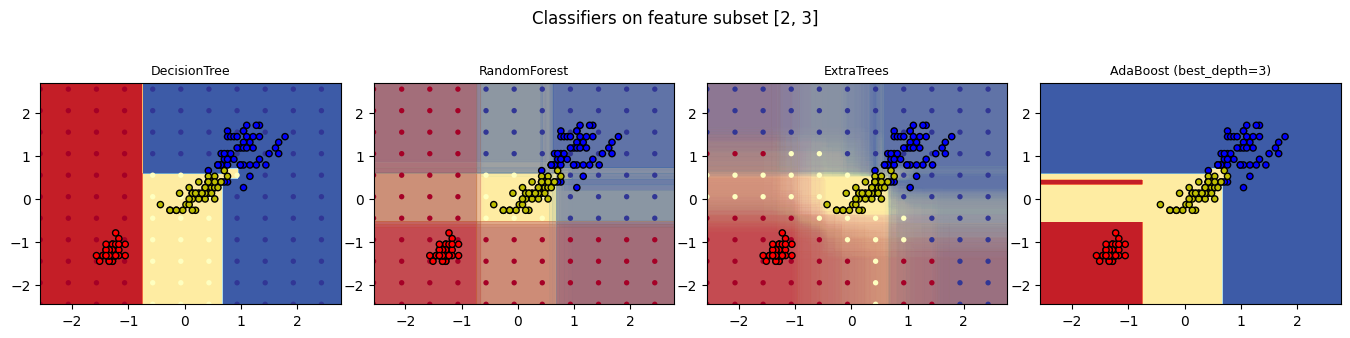

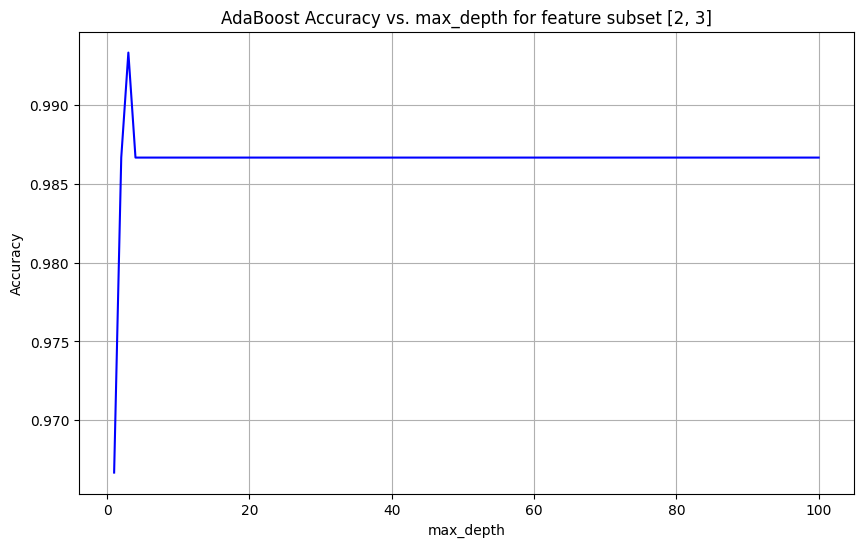

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 100
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration
max_depth_range = range(1, 101)  # Max depths for AdaBoost

# Load data
iris = load_iris()

# Initialize classifiers
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
]

for pair in ([0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]):
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Create a figure for the decision boundary plots
    plt.figure(figsize=(14, 16))
    plot_idx = 1

    for model in models:
        model.fit(X, y)
        scores = model.score(X, y)

        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(6, 4, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

    # AdaBoost: Find the best max_depth
    ada_scores = []
    best_score = 0
    best_depth = None

    for max_depth in max_depth_range:
        ada_model = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=max_depth),
            n_estimators=n_estimators,
            algorithm="SAMME",
        )
        ada_model.fit(X, y)
        score = ada_model.score(X, y)
        ada_scores.append(score)

        if score > best_score:
            best_score = score
            best_depth = max_depth

    print(f'Best max_depth for AdaBoost with feature subset {pair}: {best_depth} with accuracy {best_score}')

    # Retrain AdaBoost with the best max_depth
    ada_model_best = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=best_depth),
        n_estimators=n_estimators,
        algorithm="SAMME",
    )
    ada_model_best.fit(X, y)

    # Add AdaBoost to the plot
    plt.subplot(6, 4, plot_idx)
    plt.title(f'AdaBoost (best_depth={best_depth})', fontsize=9)

    Z = ada_model_best.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=ListedColormap(["r", "y", "b"]),
        edgecolor="k",
        s=20,
    )

    plt.suptitle(f"Classifiers on feature subset {pair}", fontsize=12)
    plt.axis("tight")
    plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
    plt.show()

    # Plot the performance of AdaBoost with different max_depth values
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, ada_scores, linestyle='-', color='b')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title(f'AdaBoost Accuracy vs. max_depth for feature subset {pair}')
    plt.grid(True)
    plt.show()
